# Assignment 3
Solve the 2D wave equation for eigenmodes and eigenfrequencies of membranes (square, rectangle, circle) with fixed boundaries. Discretize, compute eigenvalues, analyze frequency dependence on size, and visualize time evolution. Also, solve the steady-state diffusion equation on a circular domain.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from IPython.display import HTML

from src.config import *

----
## 3.1 Eigenmodus of drums or membranes of different shapes
Lorem ipsum odor amet, consectetuer adipiscing elit. Varius nullam vulputate lobortis porttitor in odio mus dictum. Tellus phasellus congue hac, tempus montes ullamcorper himenaeos. Arcu bibendum convallis lacus taciti rutrum ac dictumst mollis. Cras nullam est nostra netus nascetur iaculis hendrerit. Odio parturient purus maecenas consectetur porta hendrerit lobortis sodales. Maecenas quisque gravida sed nisi odio pellentesque habitasse. Cras tempus lacinia rhoncus conubia duis massa. Sem nibh dui mus consequat facilisi. Porta malesuada porttitor neque turpis molestie?

Consequat dictum curabitur integer suspendisse inceptos. Habitant mattis odio lorem nostra feugiat vitae vel habitasse. Scelerisque vehicula turpis eleifend, felis aptent venenatis ante fames. Tincidunt auctor quam ipsum velit ornare augue. Etiam habitant felis diam; ullamcorper netus aenean consectetur leo. Purus phasellus potenti tortor maecenas pulvinar. Auctor cras cursus hac tempor nam leo ad.

_by: Tycho Stam_

In [2]:
from src.grid_discretization import (
    initialize_grid_vector,
    initialize_tridiagonal_matrix,
)
from src.eigen_solver import (
    solve_eigenvalues,
    get_frequencies_list,
    time_dependent_solution,
    normalize_eigenmodus,
)
from script.create_plot import (
    create_seaborn_heatmap,
    plot_eigenmodus,
    plot_eigenfrequency,
    plot_eigenmode_animation,
)

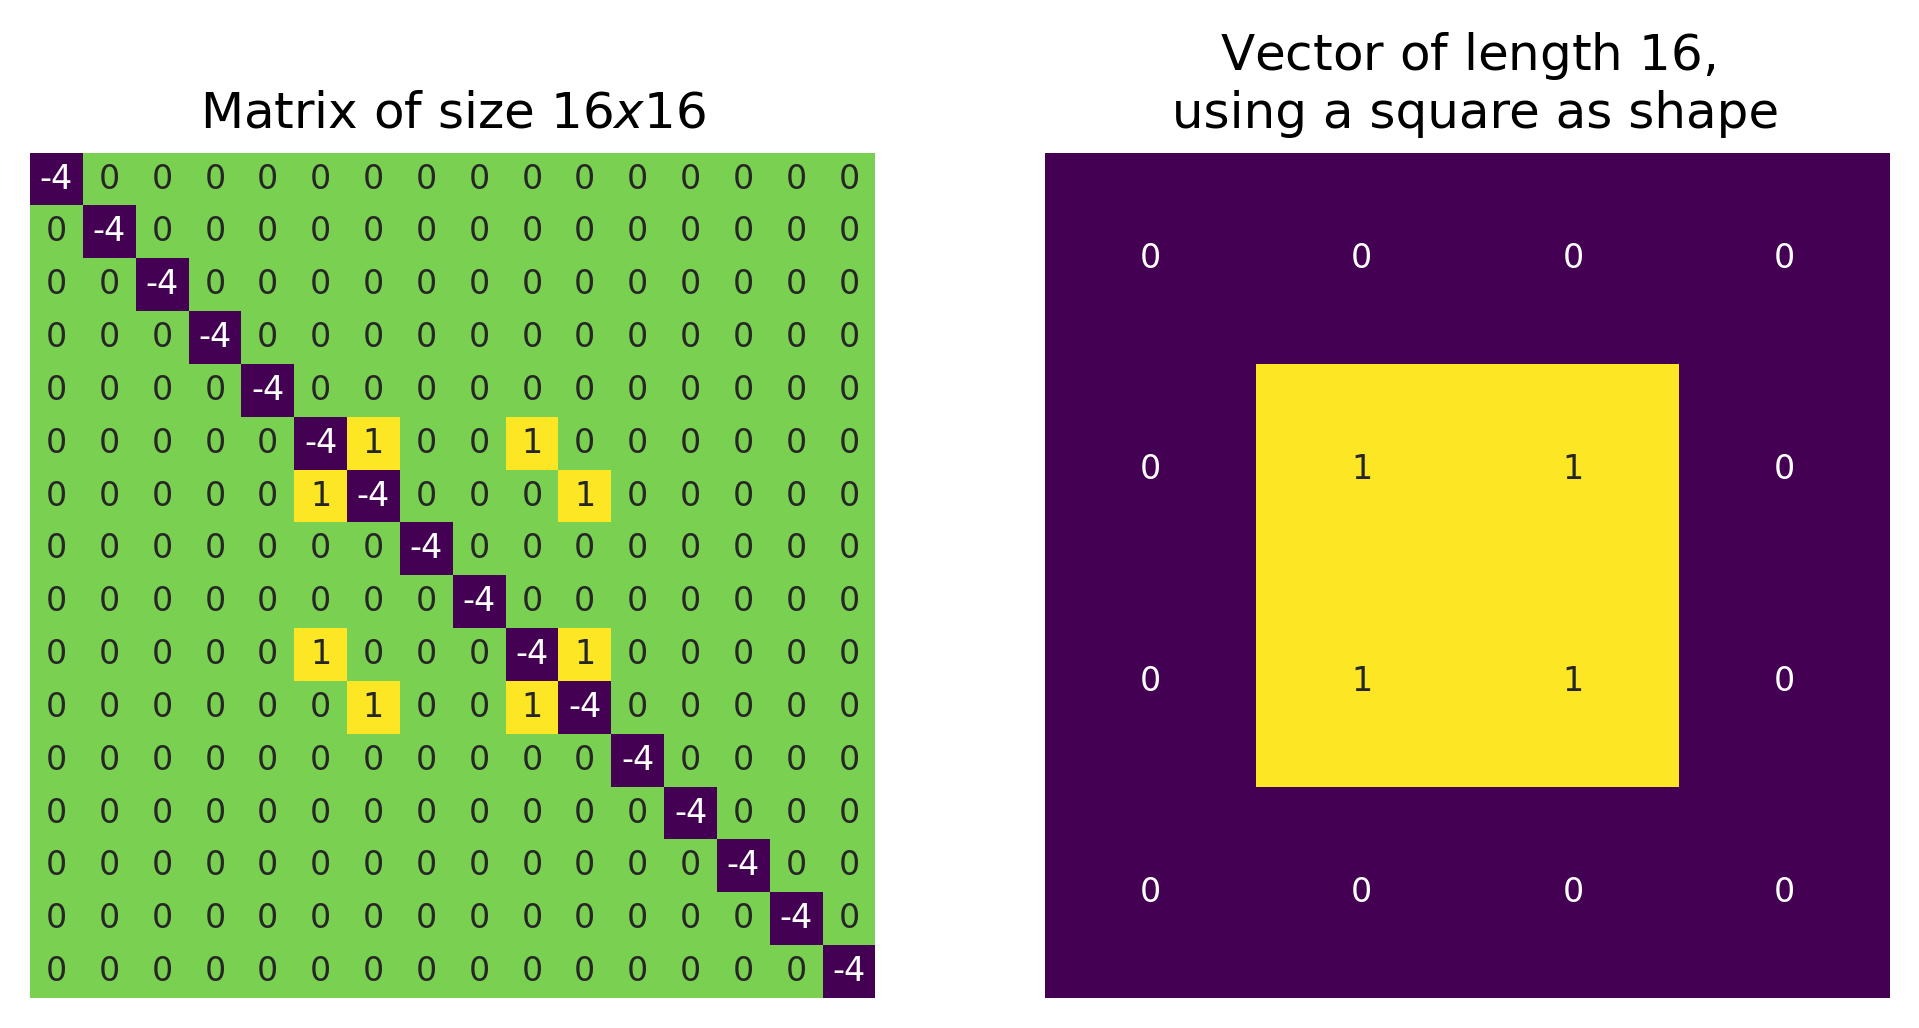

In [3]:
N, L = 4, 2
shape = "square"

v = initialize_grid_vector(N, L, shape=shape)
M = initialize_tridiagonal_matrix(v)

_, ax = plt.subplots(1, 2, figsize=(FIG_SIZE), dpi=FIG_DPI)

create_seaborn_heatmap(M.toarray(), ax[0])
ax[0].set_title(f"Matrix of size ${N**2} x {N**2}$")

create_seaborn_heatmap(v.reshape(N, N), ax[1])
ax[1].set_title(f"Vector of length ${N**2}$,\n using a {shape} as shape")

plt.show()

<!-- TODO explain this -->
Figure

In [4]:
dx = 0.01
N = 55

v = initialize_grid_vector(N, L, shape=shape)

In [5]:
%%time
M = initialize_tridiagonal_matrix(vector=v, sparse=False)

M = M * dx**2
frequencies, eigenvectors = solve_eigenvalues(M, model="h")

Time taken to solve the eigenvalues: 2.39 seconds with matrix of size 3025, N=55
CPU times: user 14 s, sys: 161 ms, total: 14.1 s
Wall time: 2.46 s


In [6]:
%%time
M = initialize_tridiagonal_matrix(vector=v, sparse=True)

M = M * dx**2
frequencies, eigenvectors = solve_eigenvalues(M, model="h")

Time taken to solve the eigenvalues: 0.00 seconds using sparse solver with matrix of size 3025, N=55
CPU times: user 701 ms, sys: 98.8 ms, total: 800 ms
Wall time: 145 ms


In [7]:
def plot_shape_modus(shape: str) -> None:
    """
    Plot the eigenmodes of a given shape.

    Params
    ----------
    - shape (str): The shape of the grid.
    """
    L = N - 10
    v = initialize_grid_vector(N, L, shape=shape)

    M = initialize_tridiagonal_matrix(vector=v, sparse=True)
    M = M * dx**2
    frequencies, eigenvectors = solve_eigenvalues(M, model="h")

    plot_eigenmodus(
        PLOTS_AMOUNT, N, L, frequencies, eigenvectors, shape, save_img=False
    )

Time taken to solve the eigenvalues: 0.05 seconds using sparse solver with matrix of size 3025, N=55


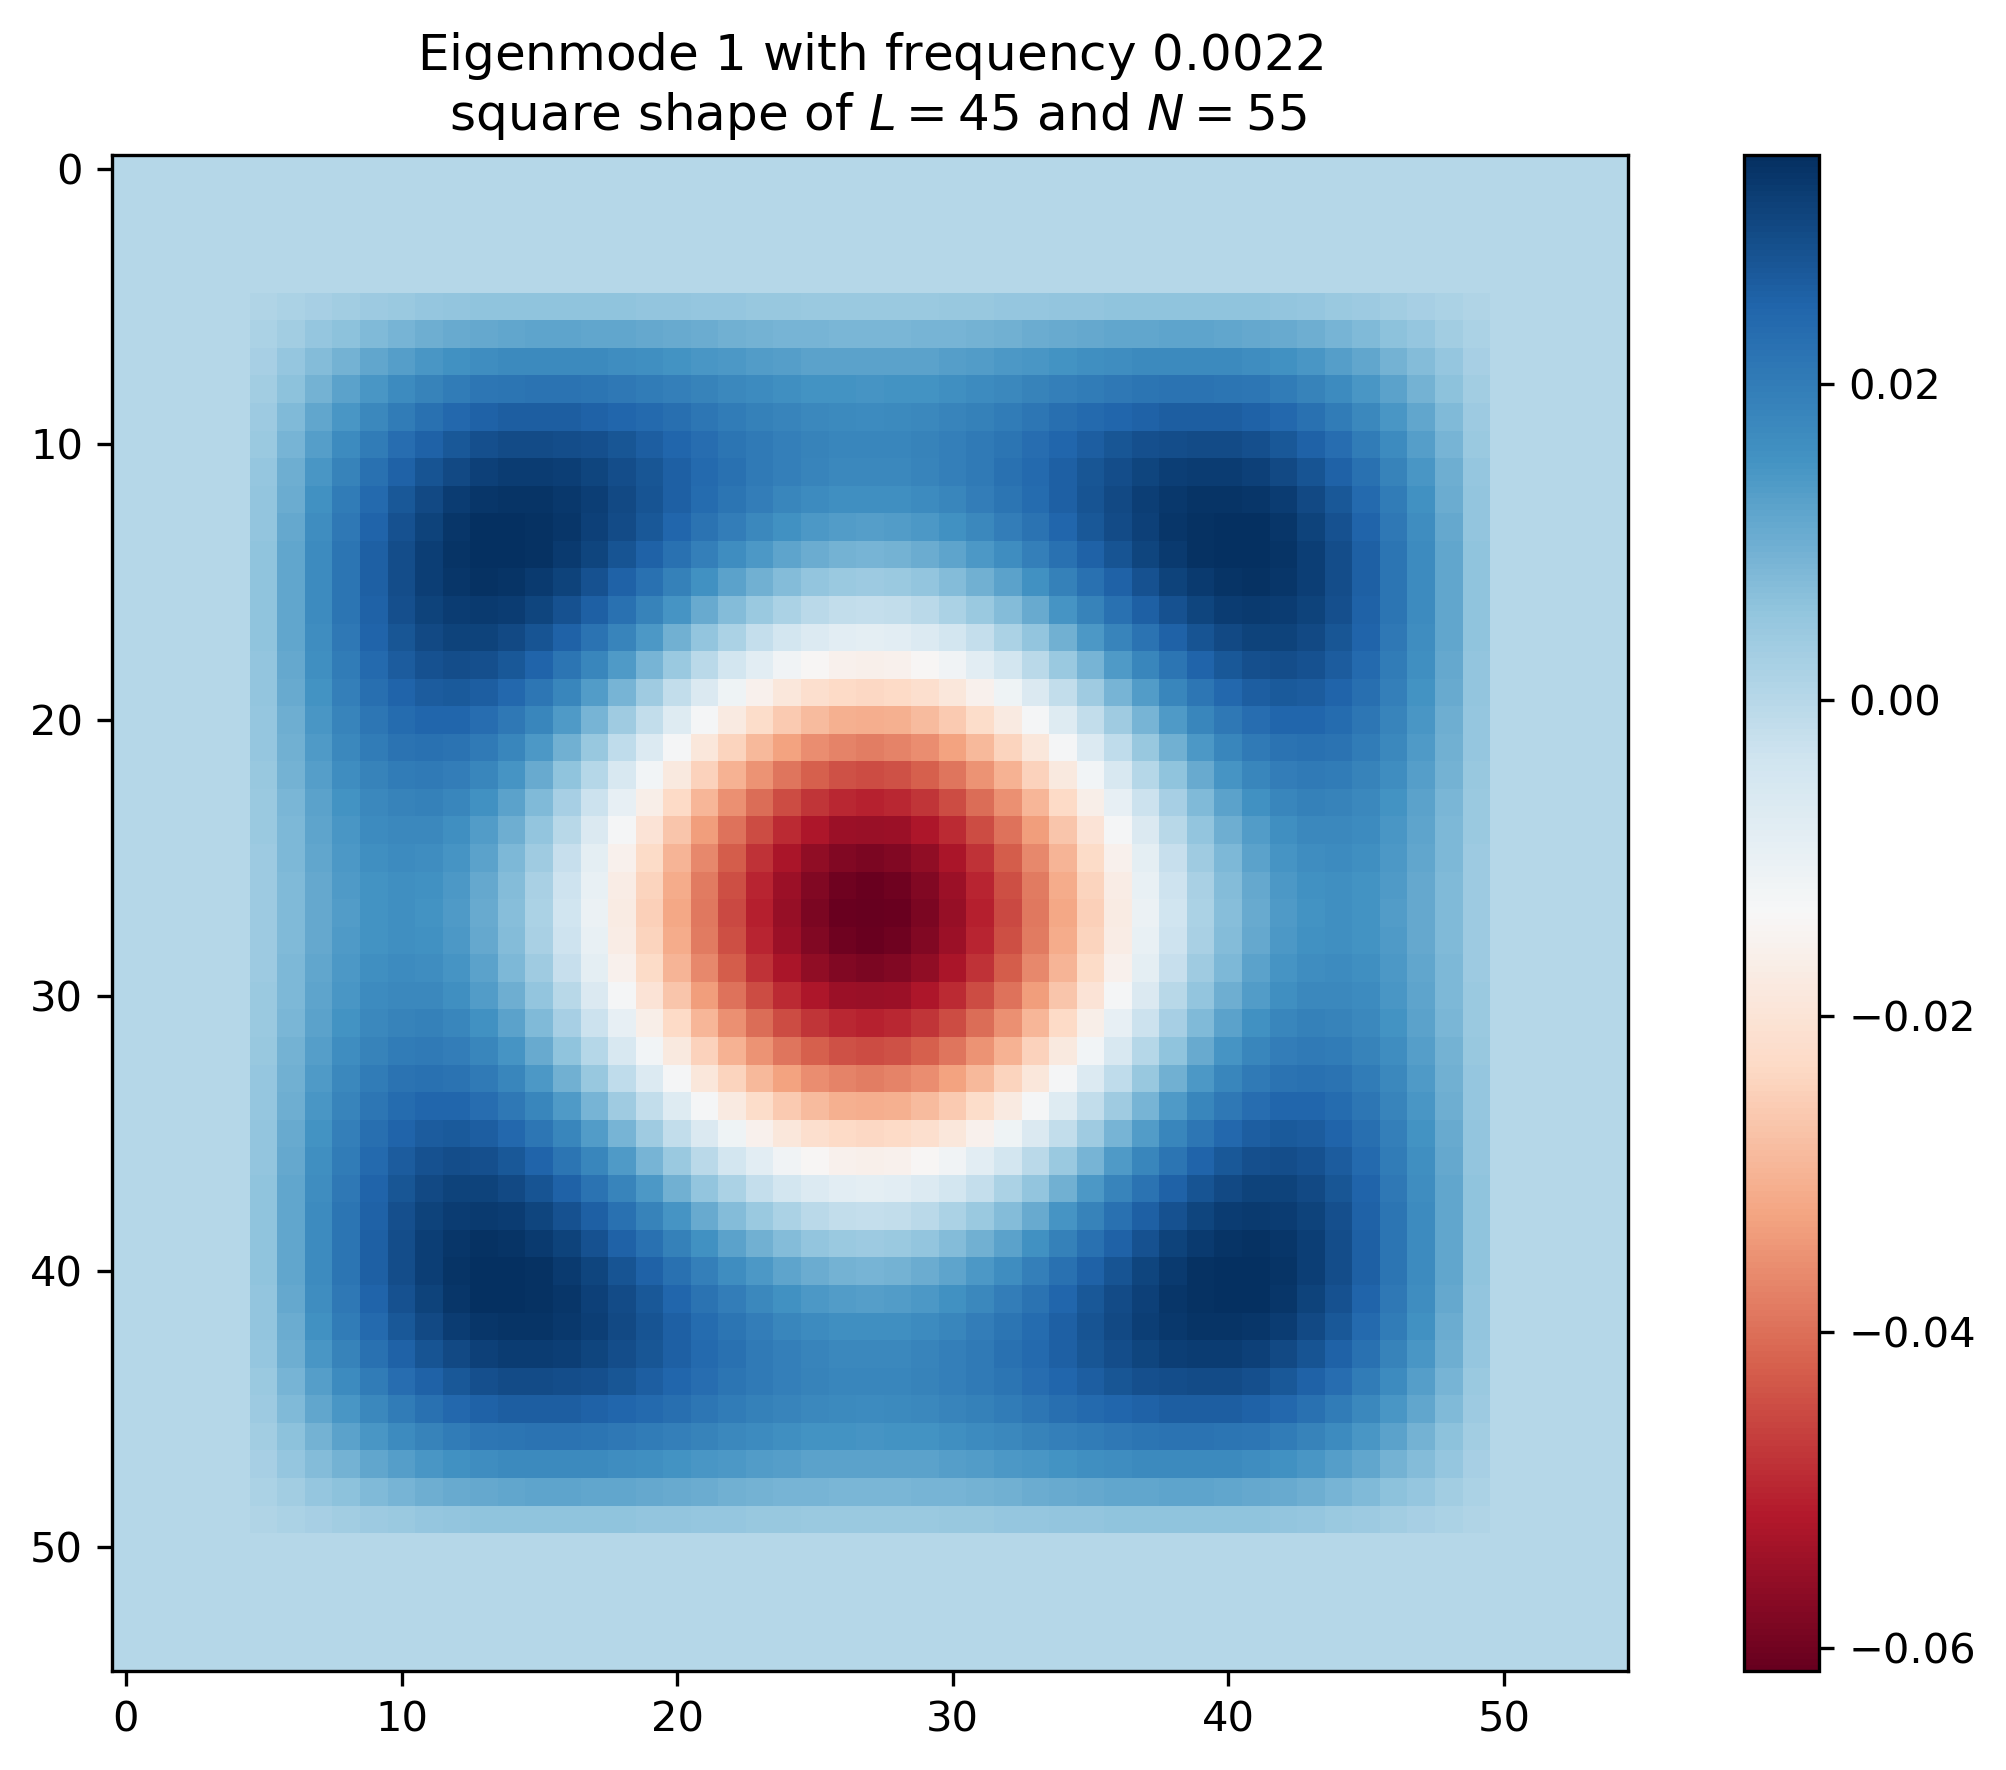

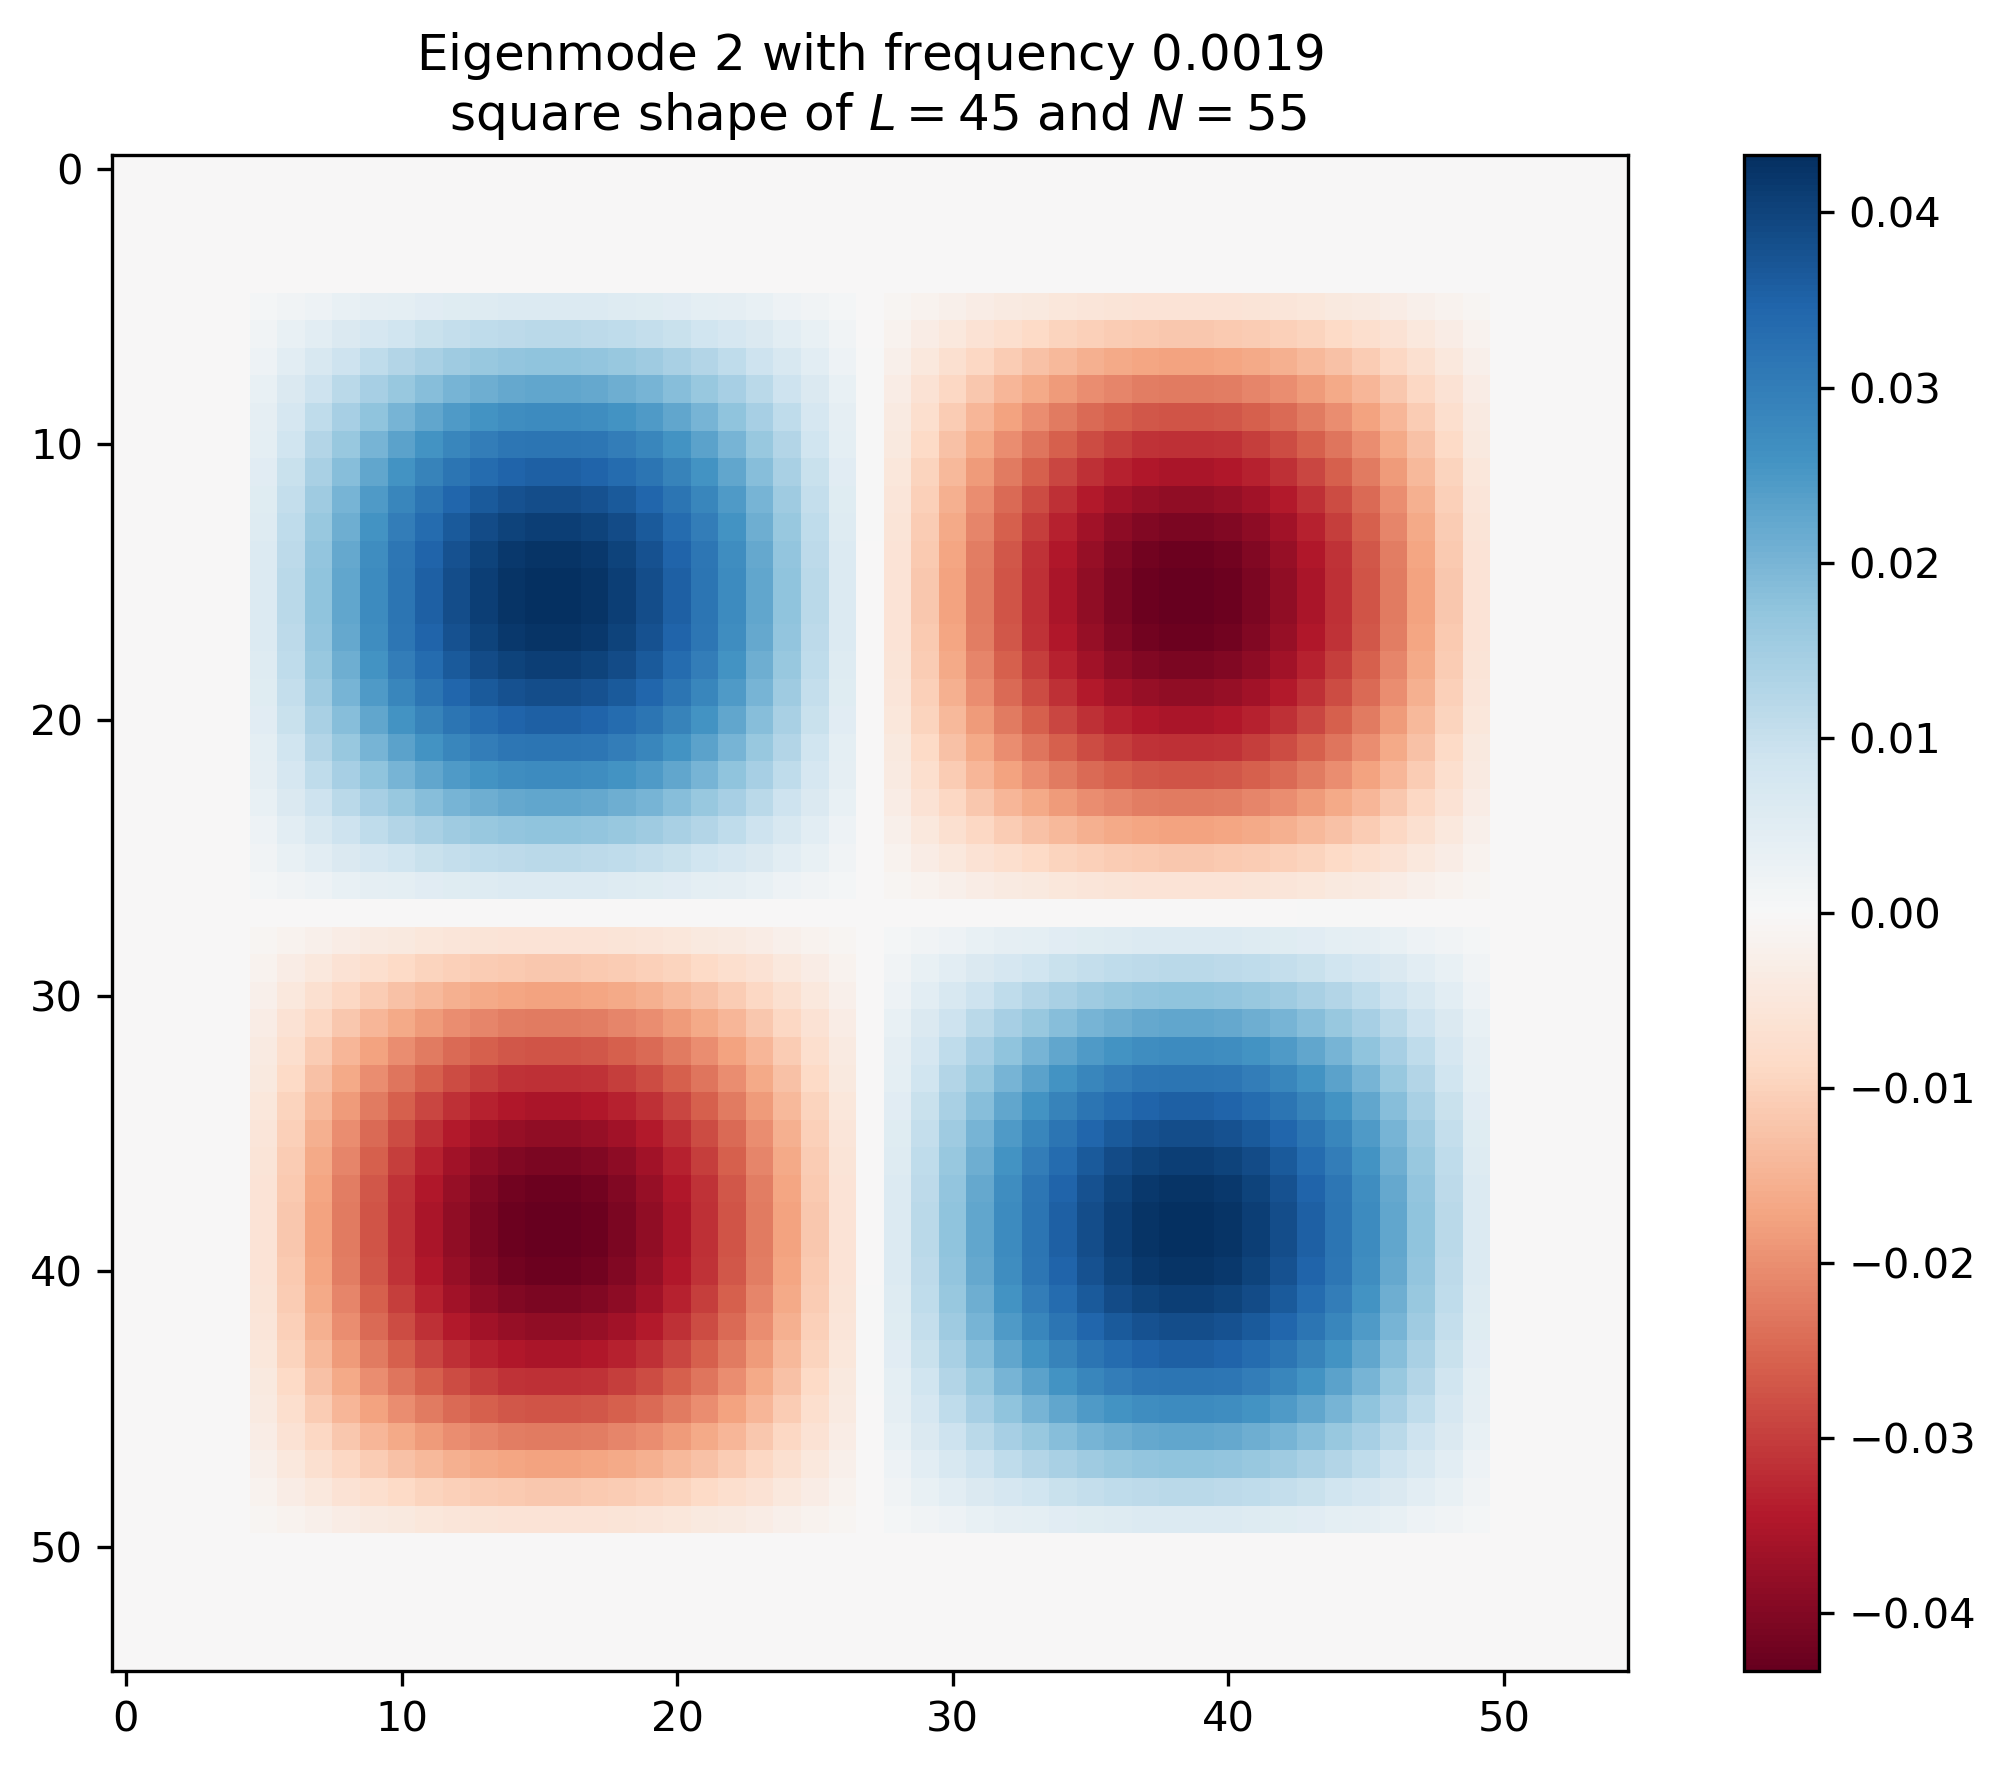

In [8]:
plot_shape_modus("square")

Time taken to solve the eigenvalues: 0.03 seconds using sparse solver with matrix of size 3025, N=55


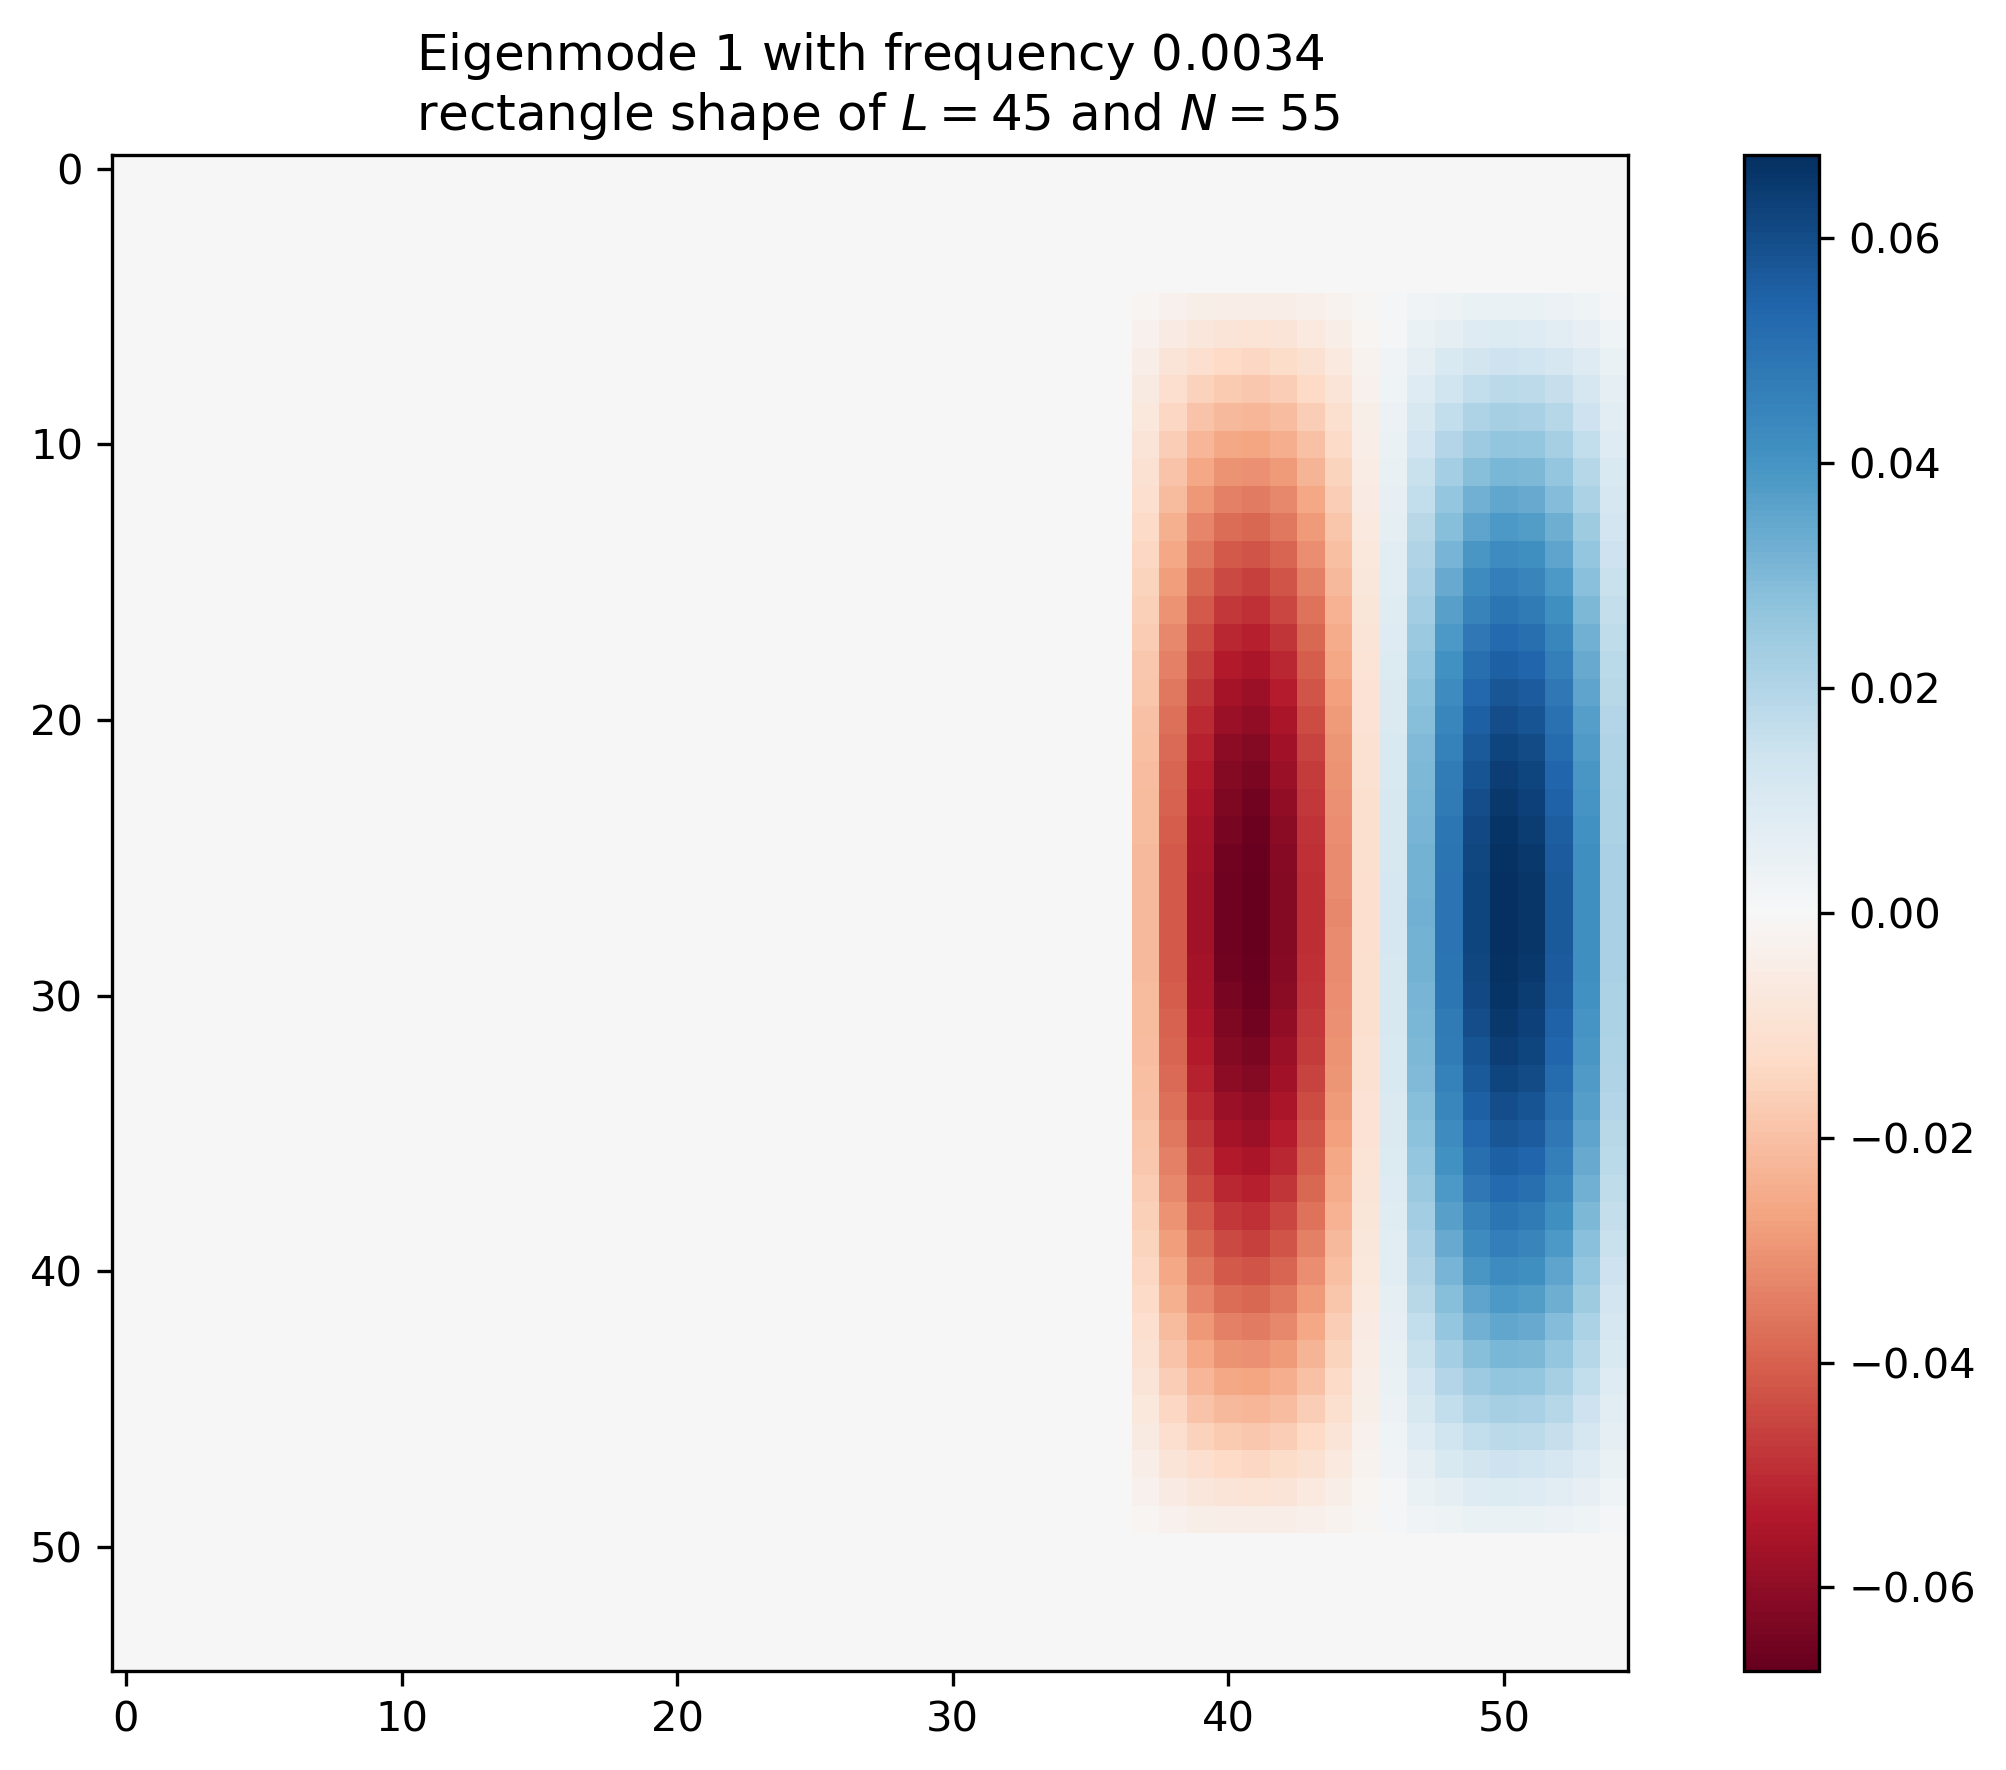

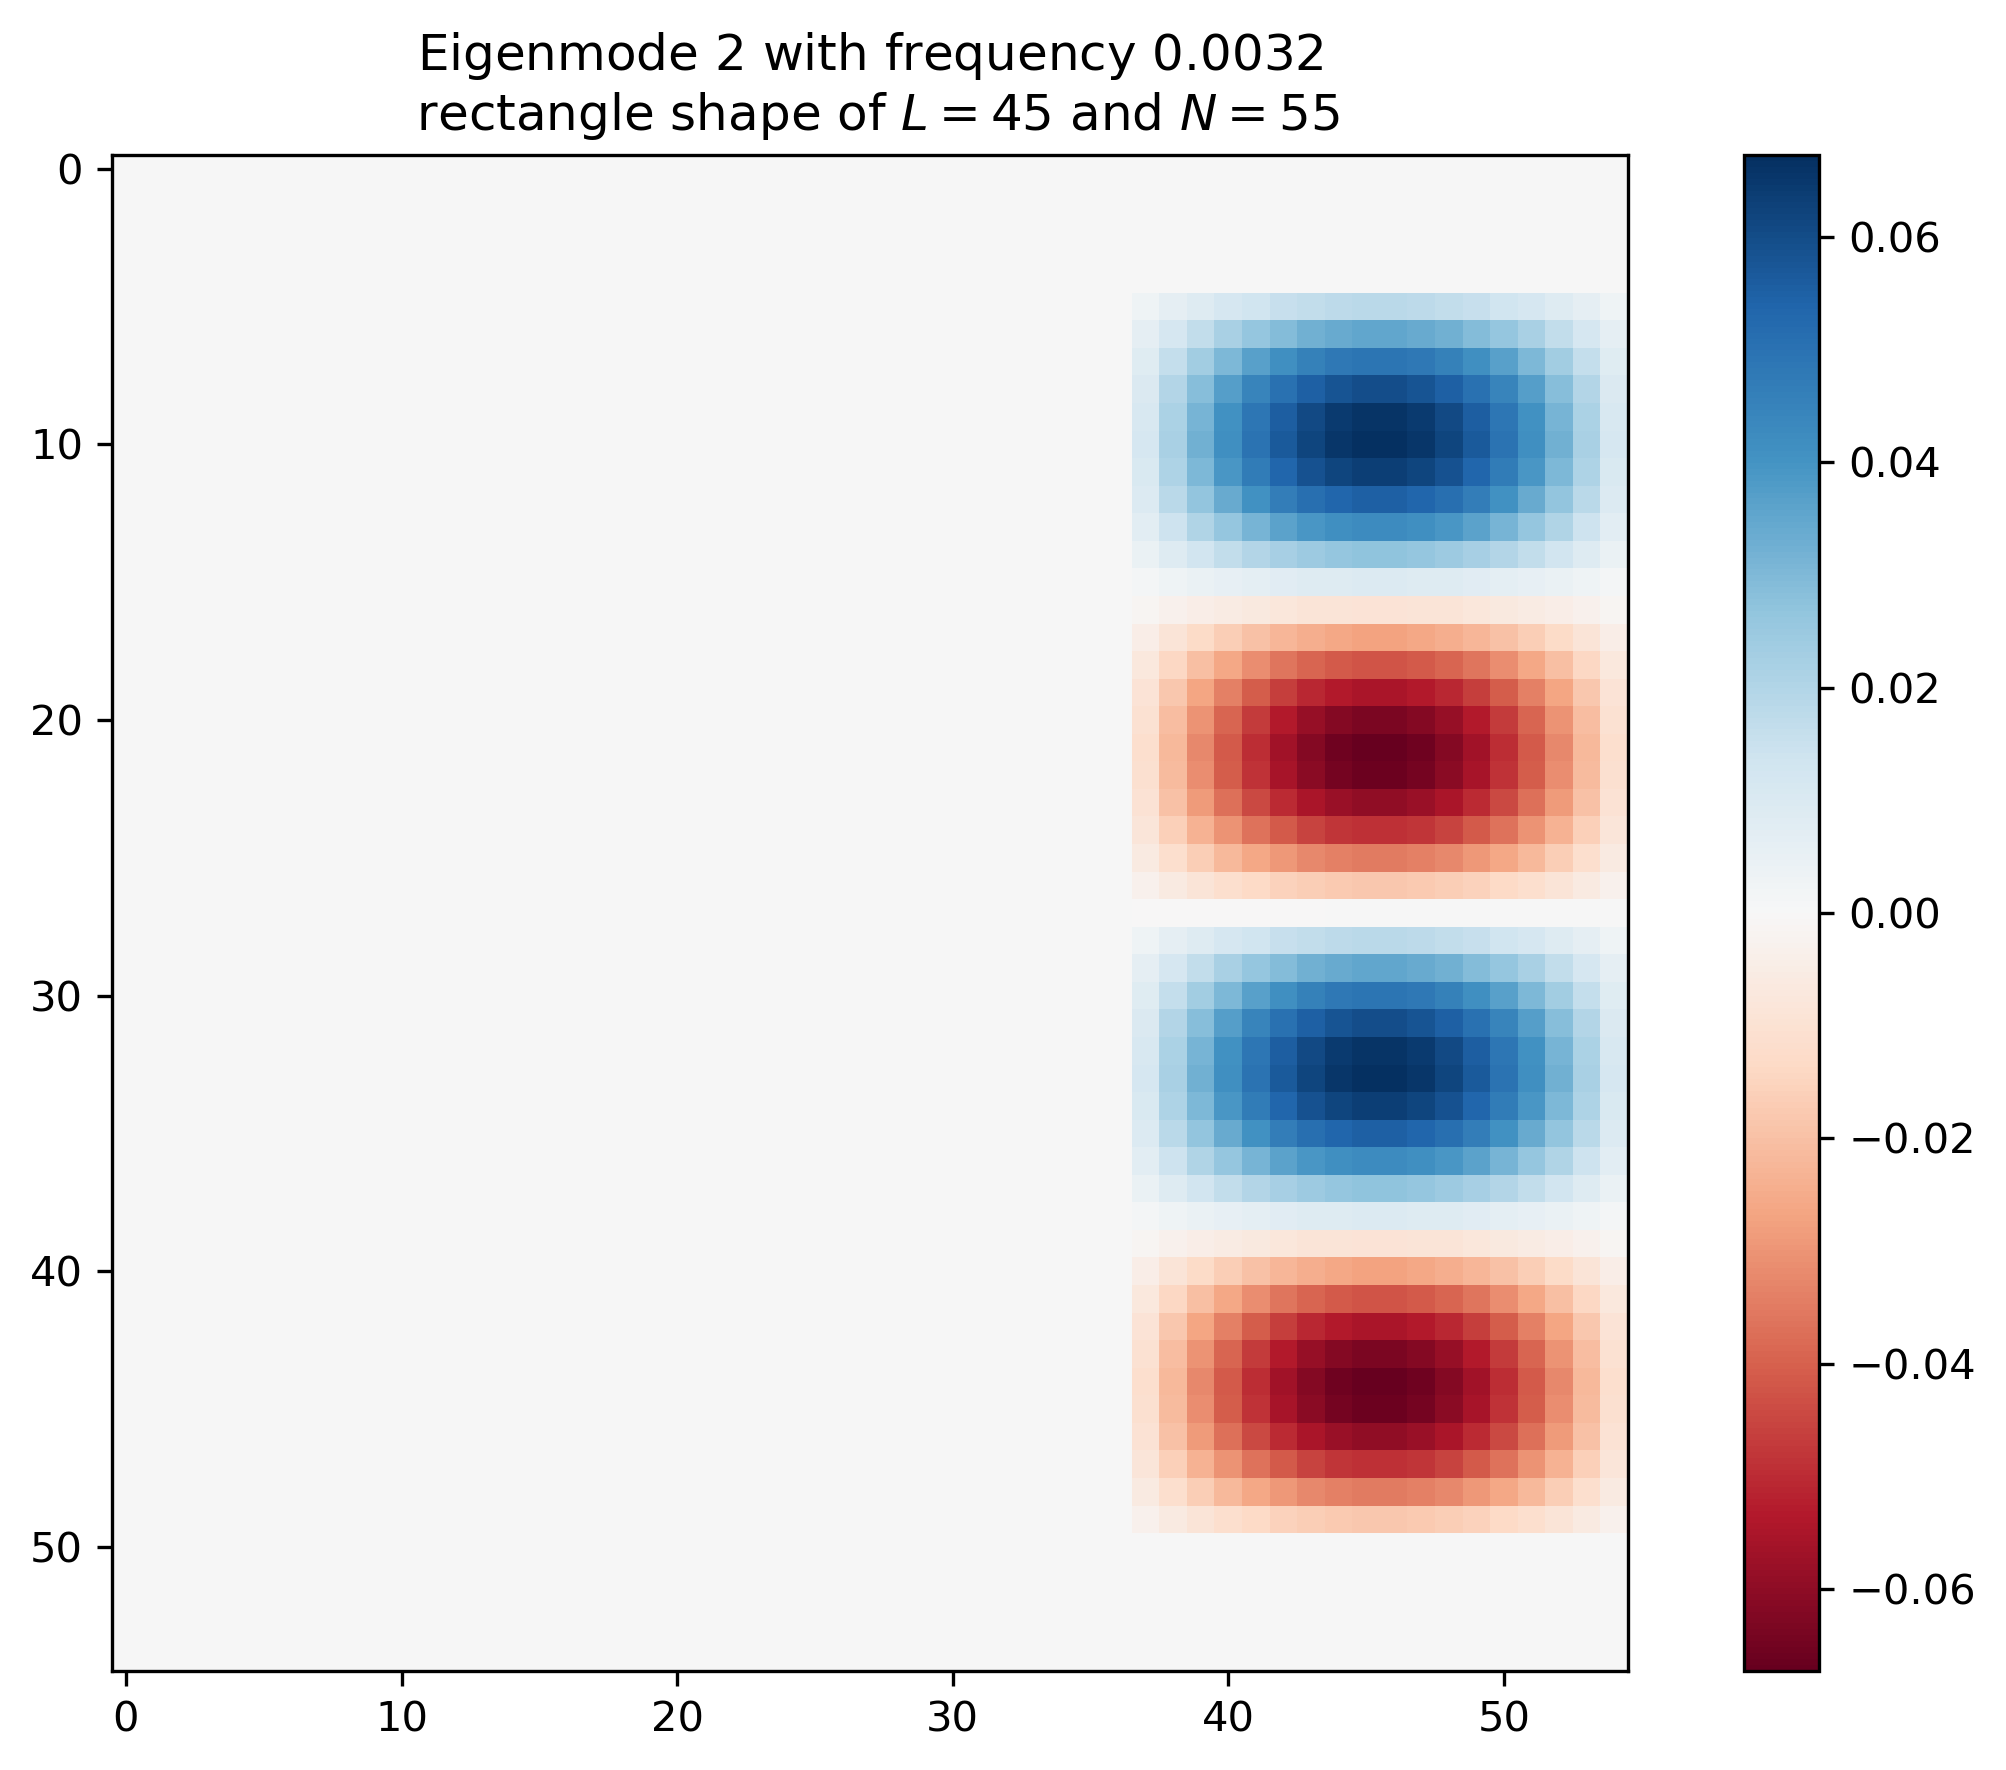

In [9]:
plot_shape_modus("rectangle")

Time taken to solve the eigenvalues: 0.04 seconds using sparse solver with matrix of size 3025, N=55


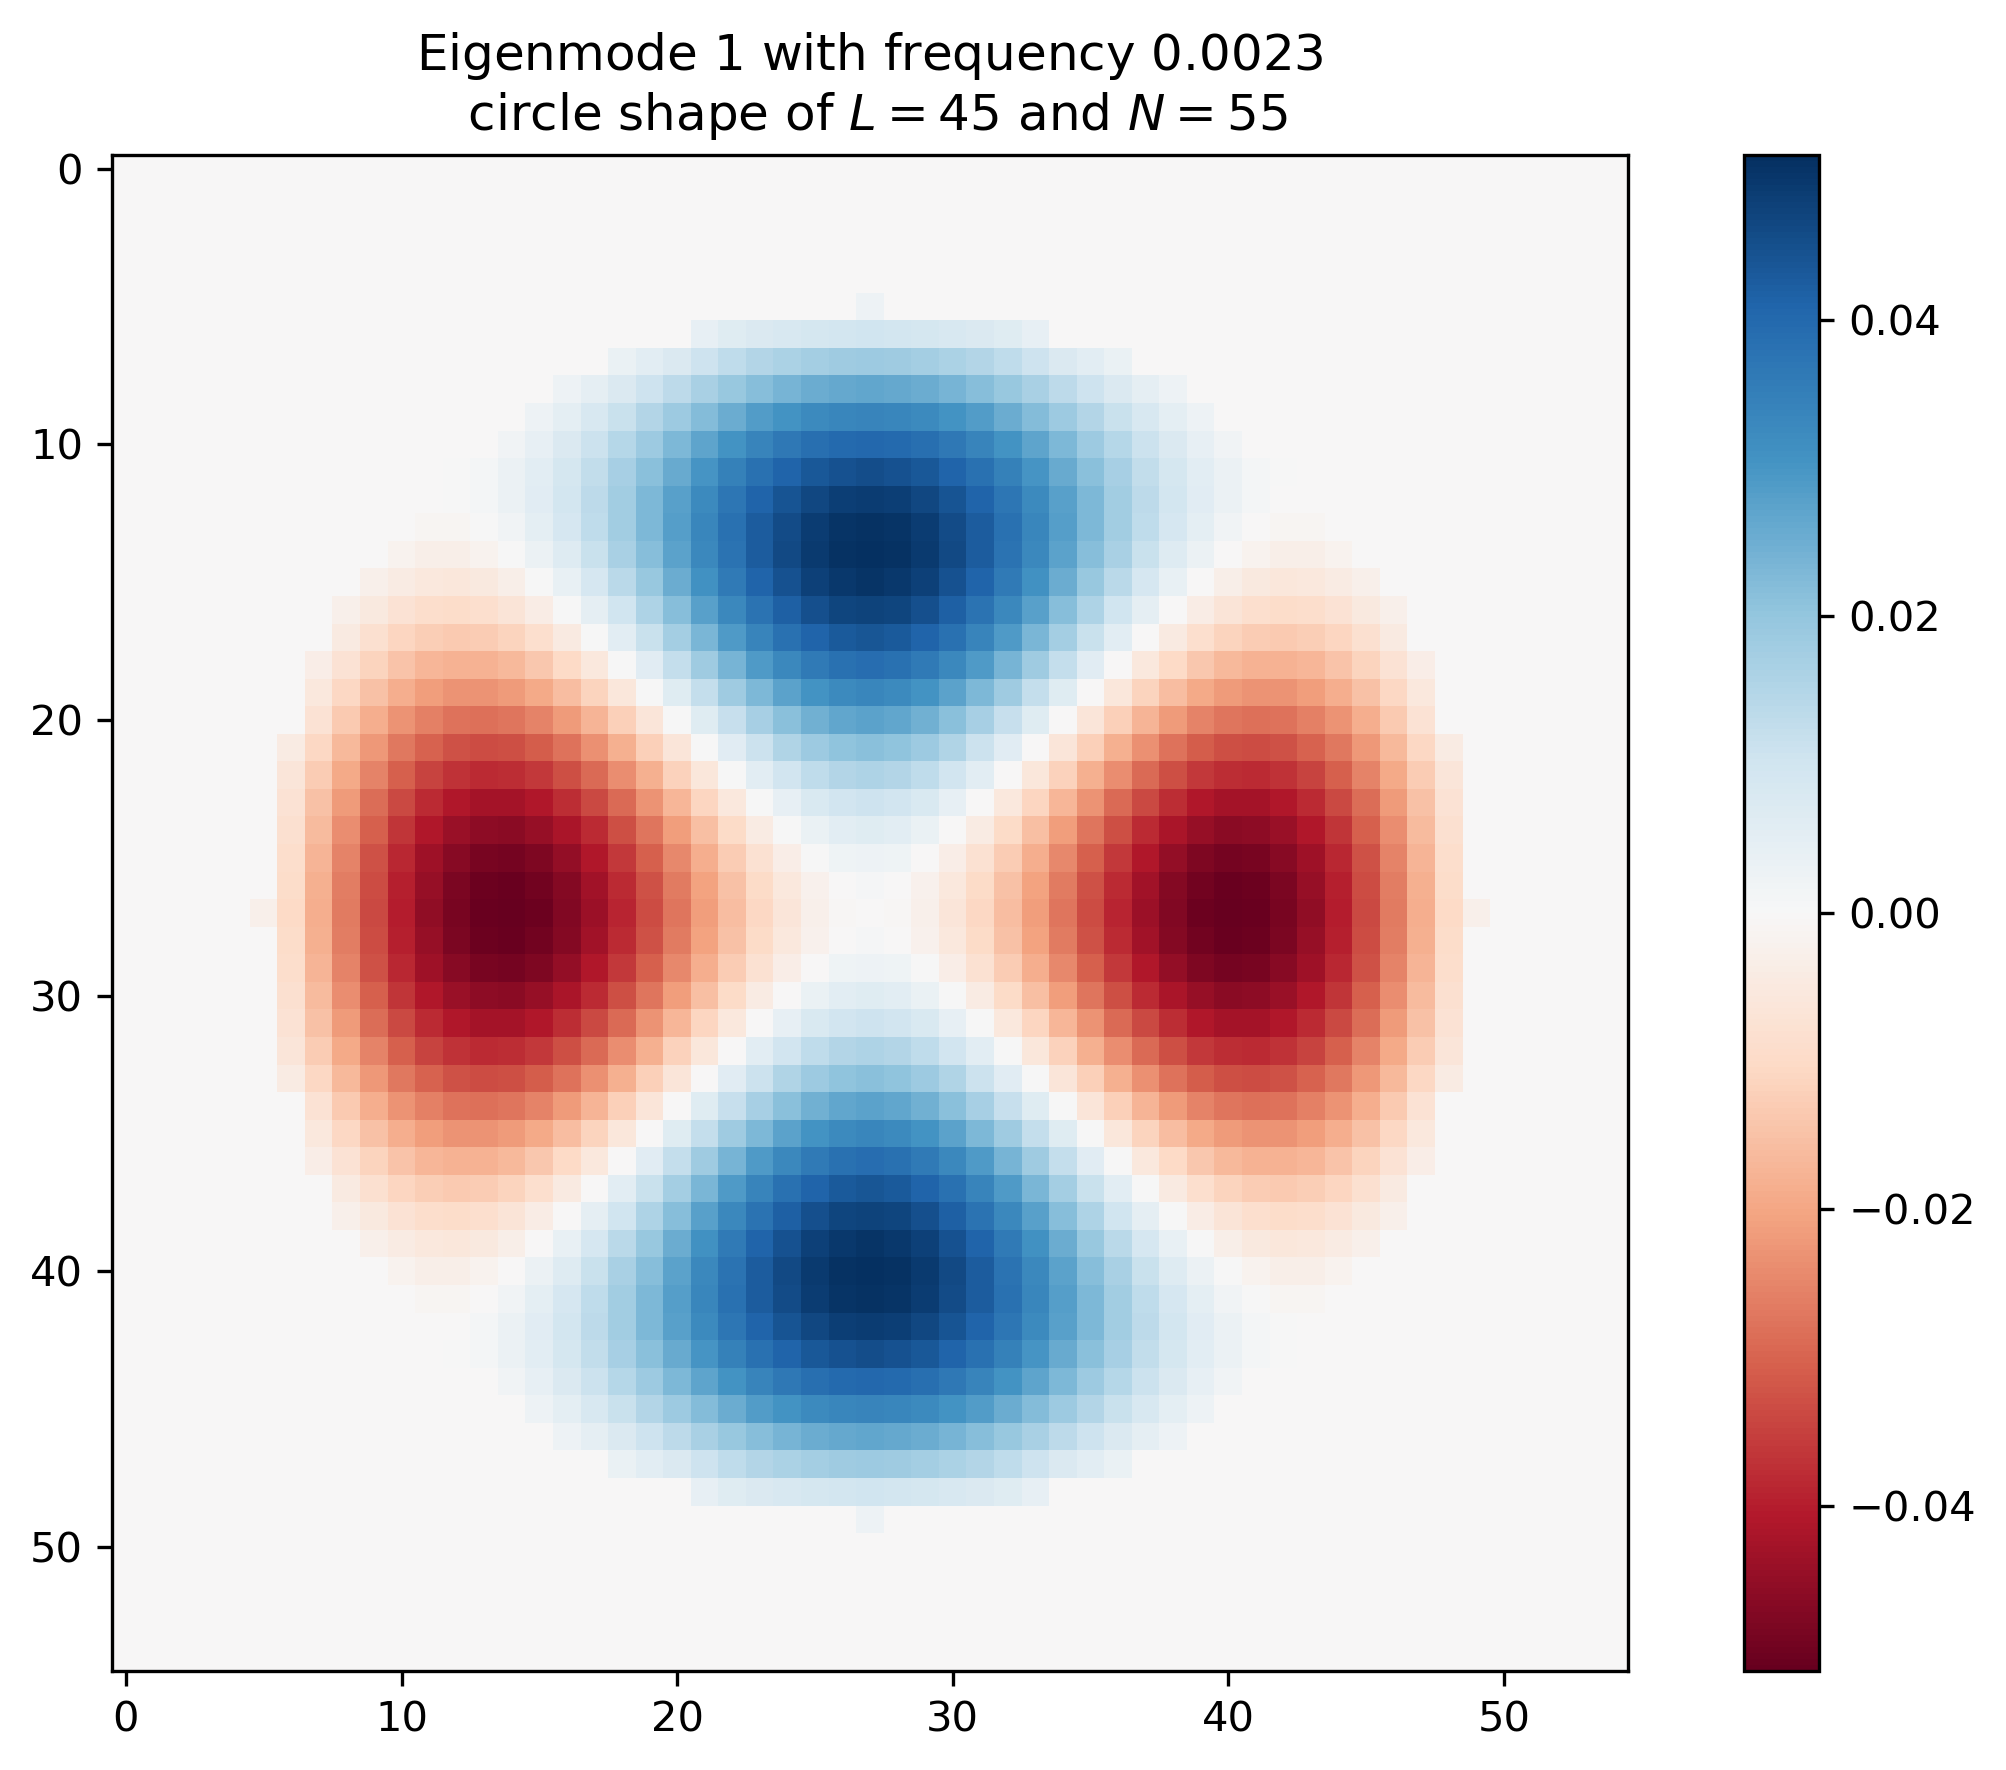

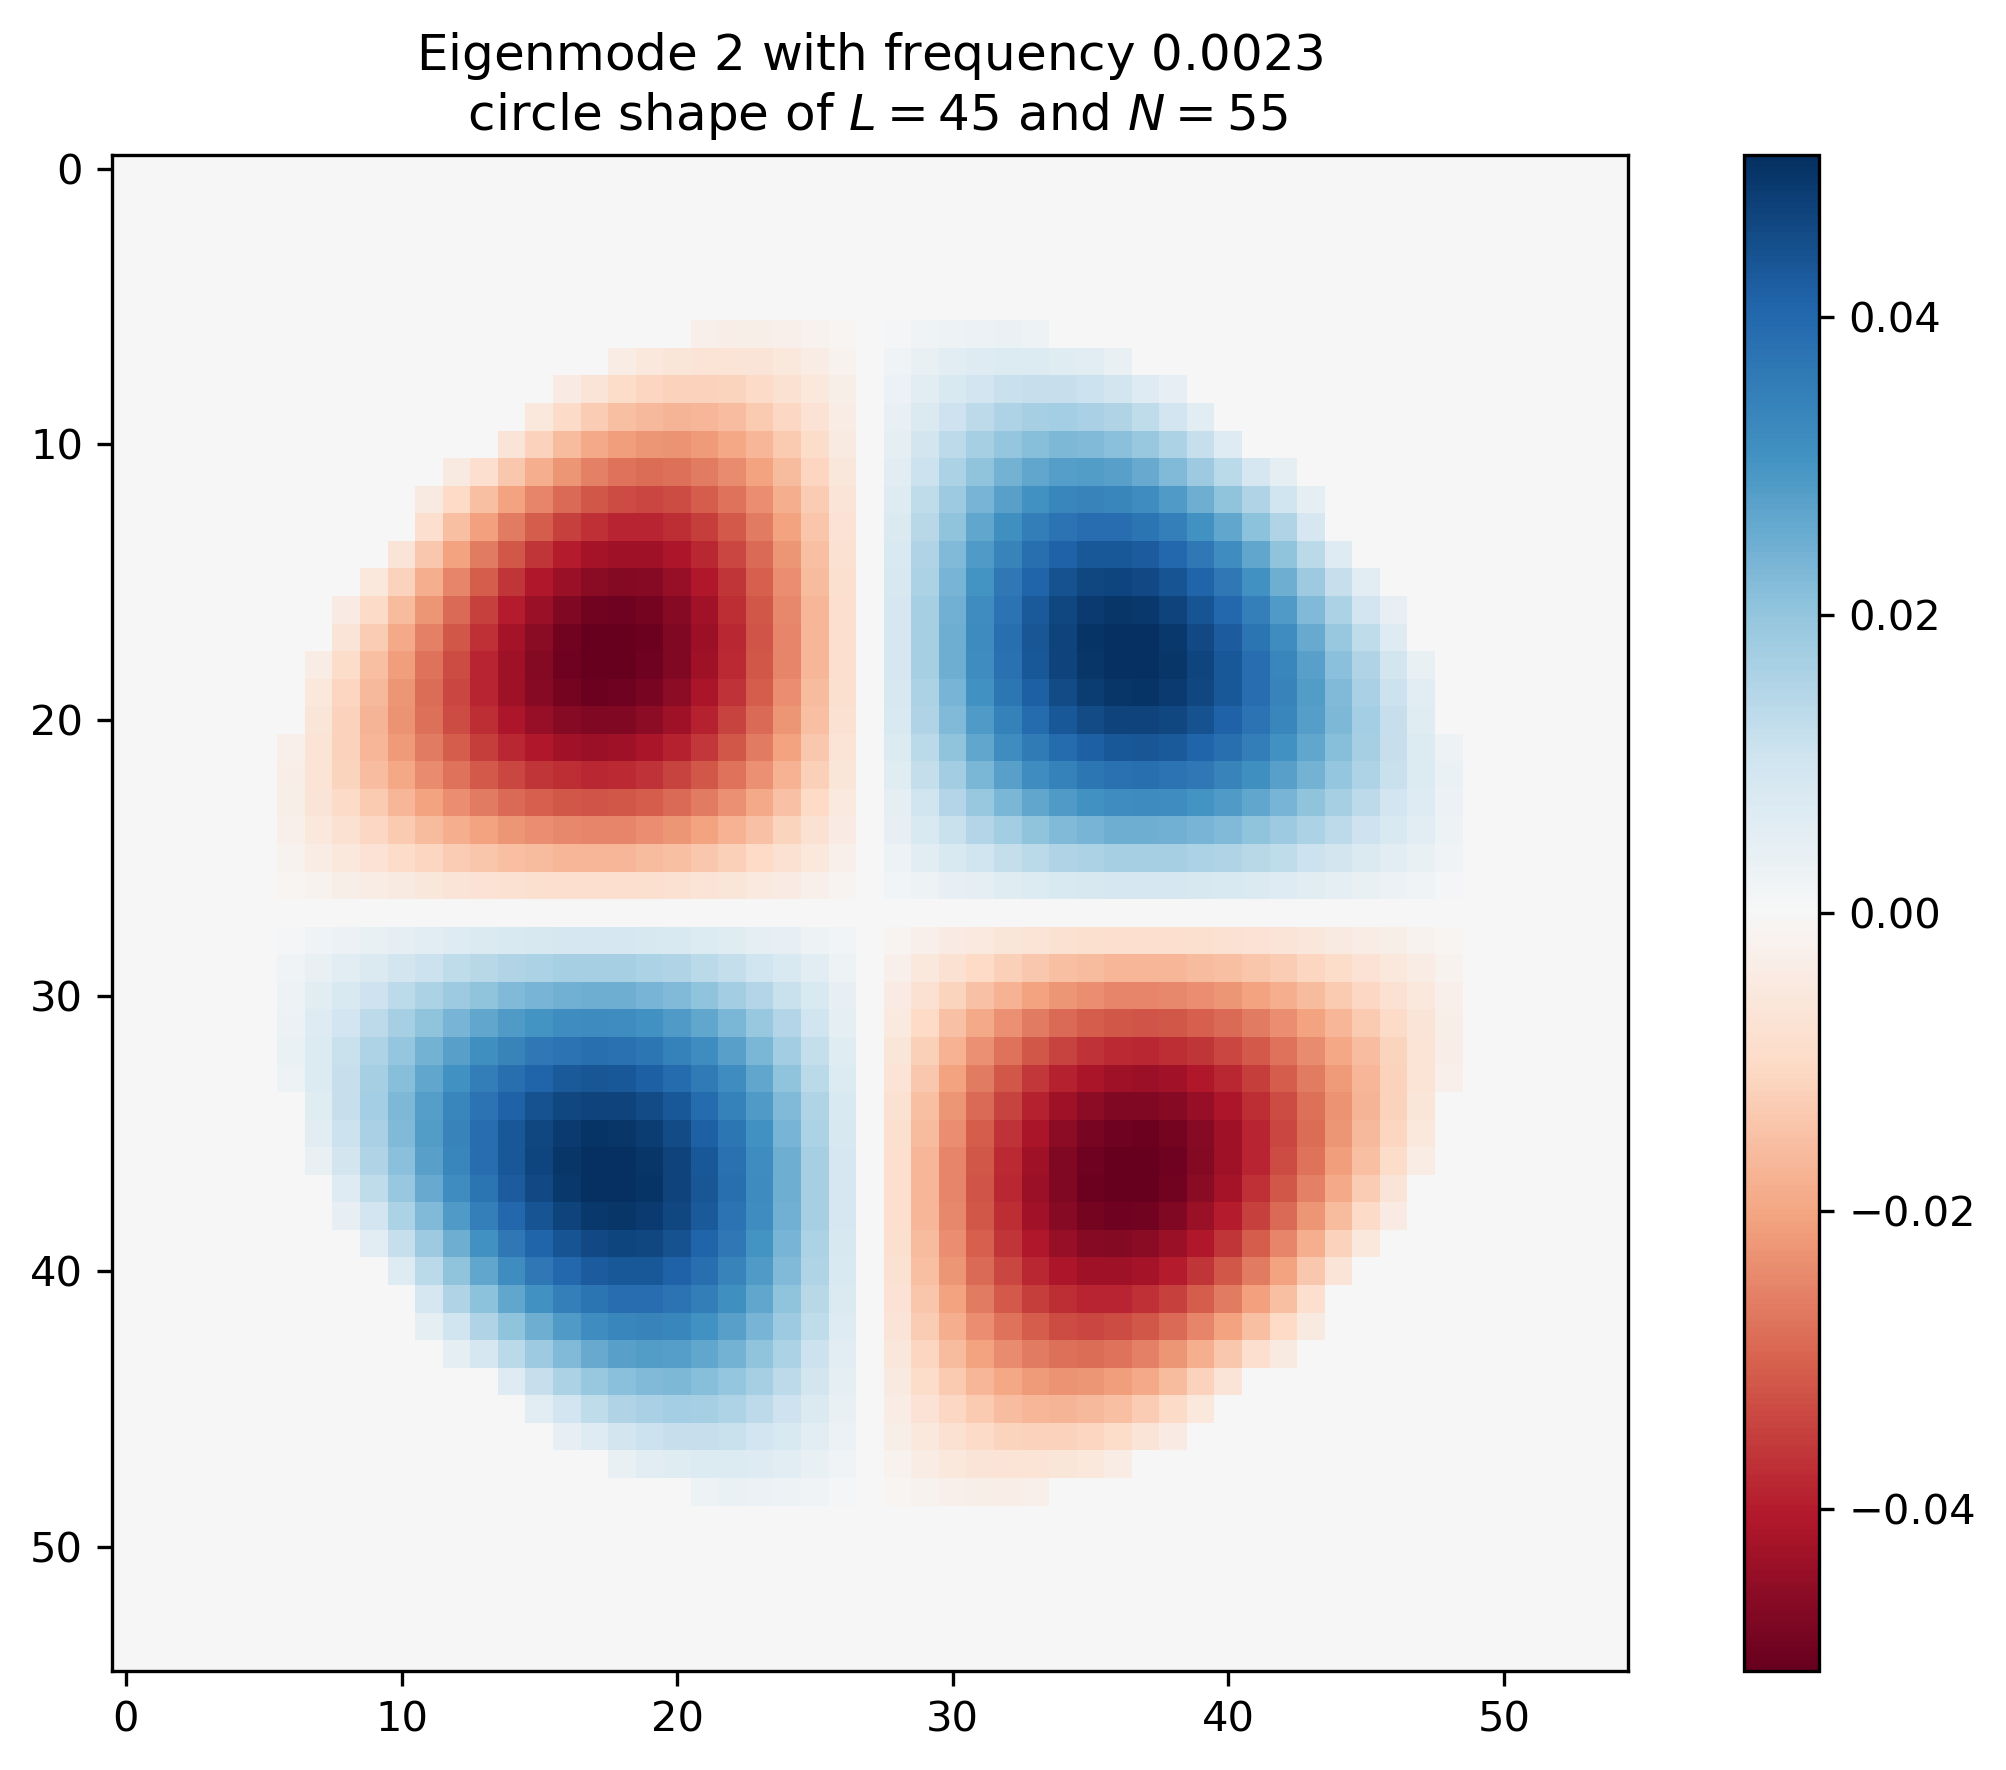

In [10]:
plot_shape_modus("circle")

In [11]:
def plot_shape_frequency(shape: str) -> None:
    """
    Plot the frequency of a given shape.

    Params
    ----------
    - shape (str): The shape of the grid.
    """
    L_list = np.linspace(1, N - 10, NUM_MODES, dtype=int)
    frequencies_list = get_frequencies_list(N, dx, L_list, shape)

    plot_eigenfrequency(L_list, frequencies_list, N, shape, save_img=False)

Time taken to solve the eigenvalues: 0.00 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.01 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.02 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.04 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.05 seconds using sparse solver with matrix of size 3025, N=55


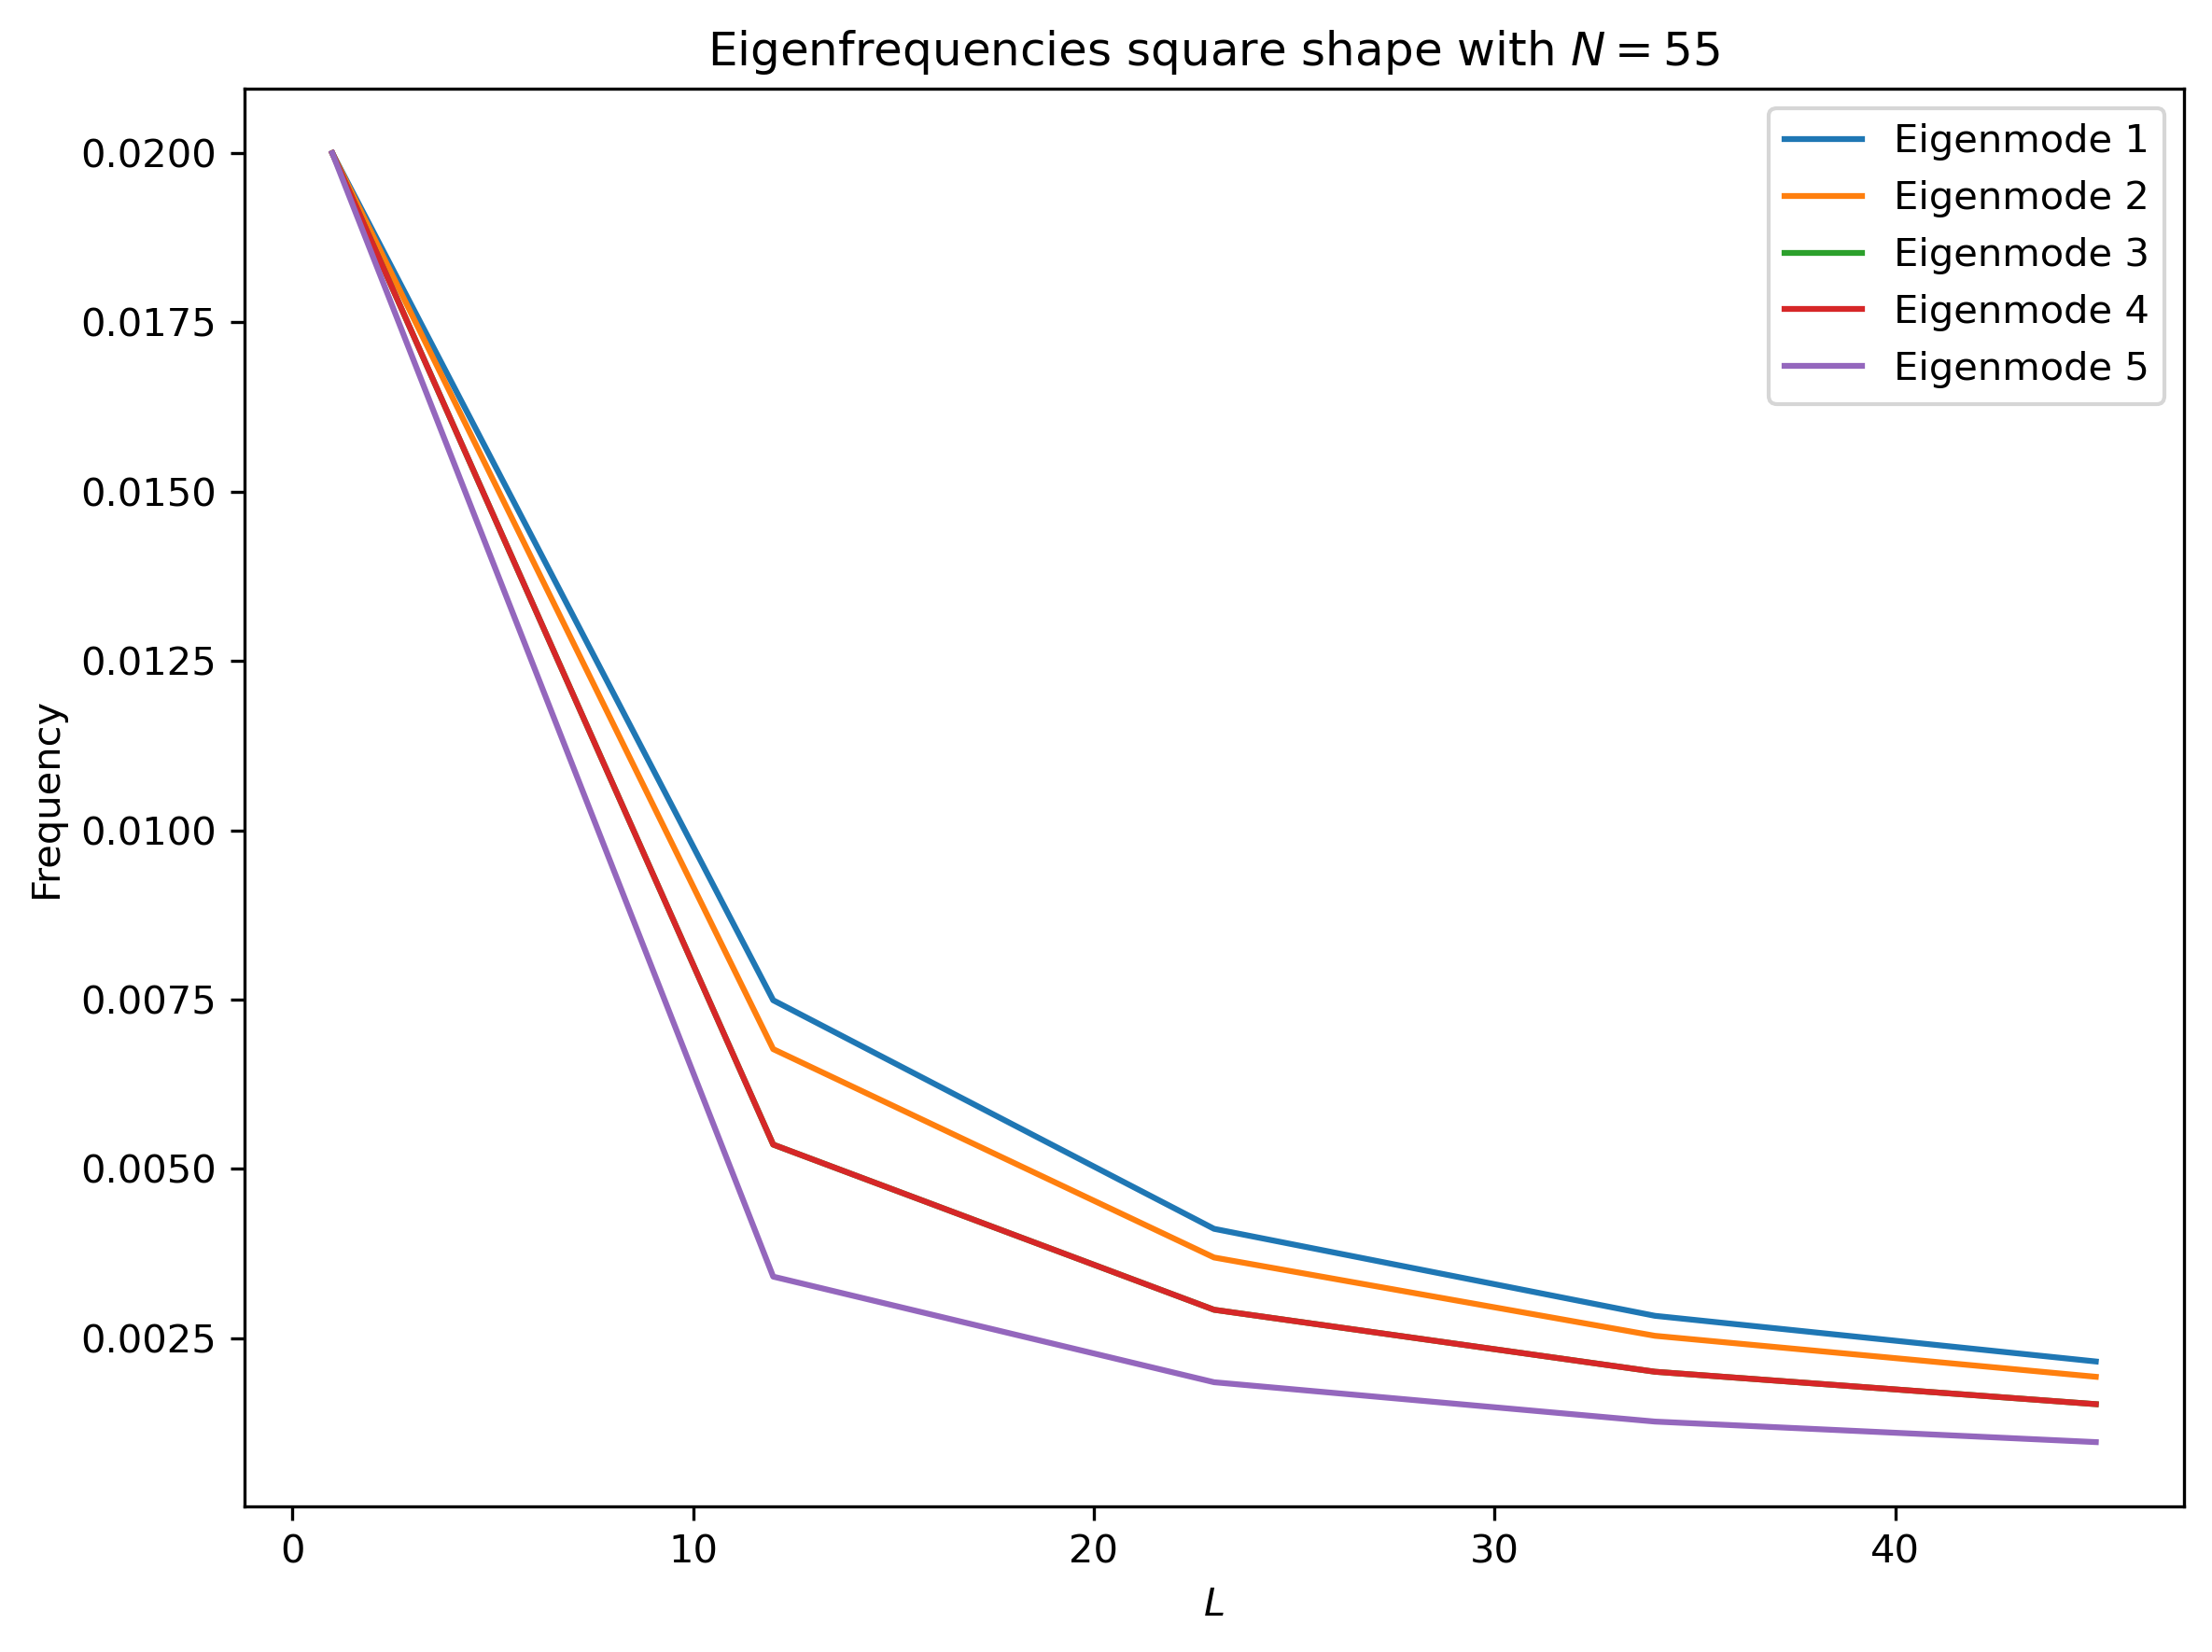

In [12]:
plot_shape_frequency("square")

Time taken to solve the eigenvalues: 0.00 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.02 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.03 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.01 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.03 seconds using sparse solver with matrix of size 3025, N=55


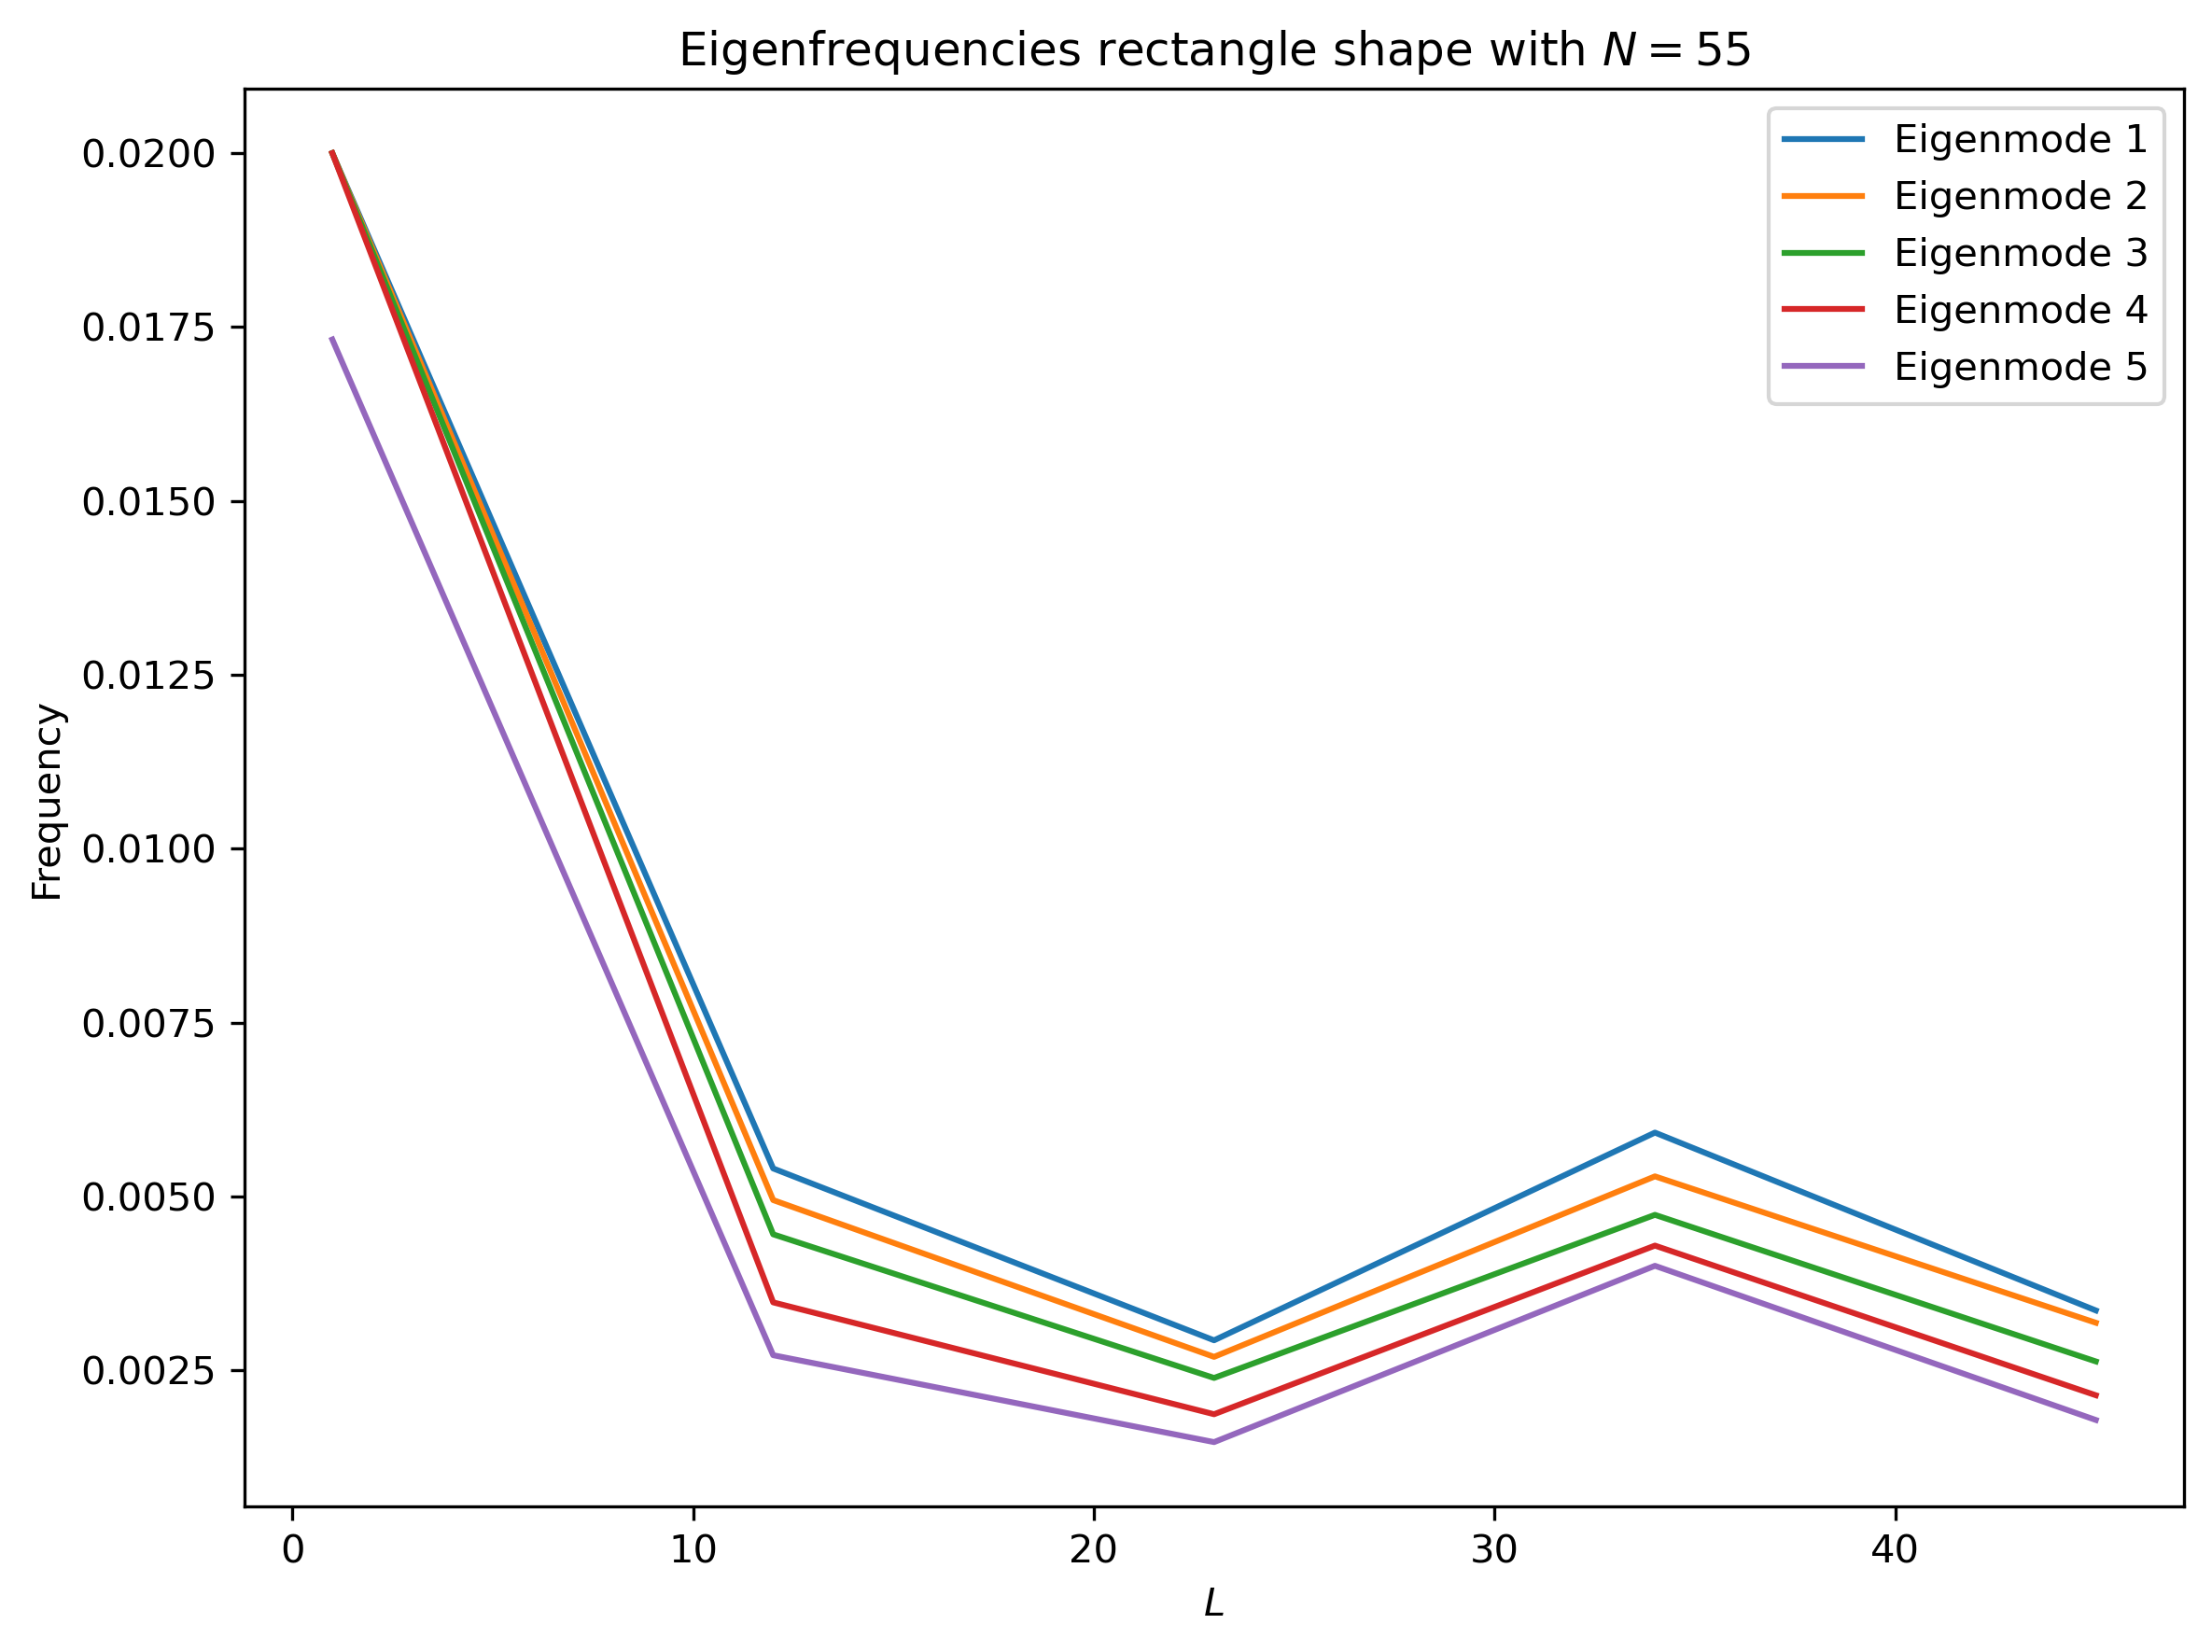

In [13]:
plot_shape_frequency("rectangle")

Time taken to solve the eigenvalues: 0.00 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.01 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.01 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.03 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.03 seconds using sparse solver with matrix of size 3025, N=55


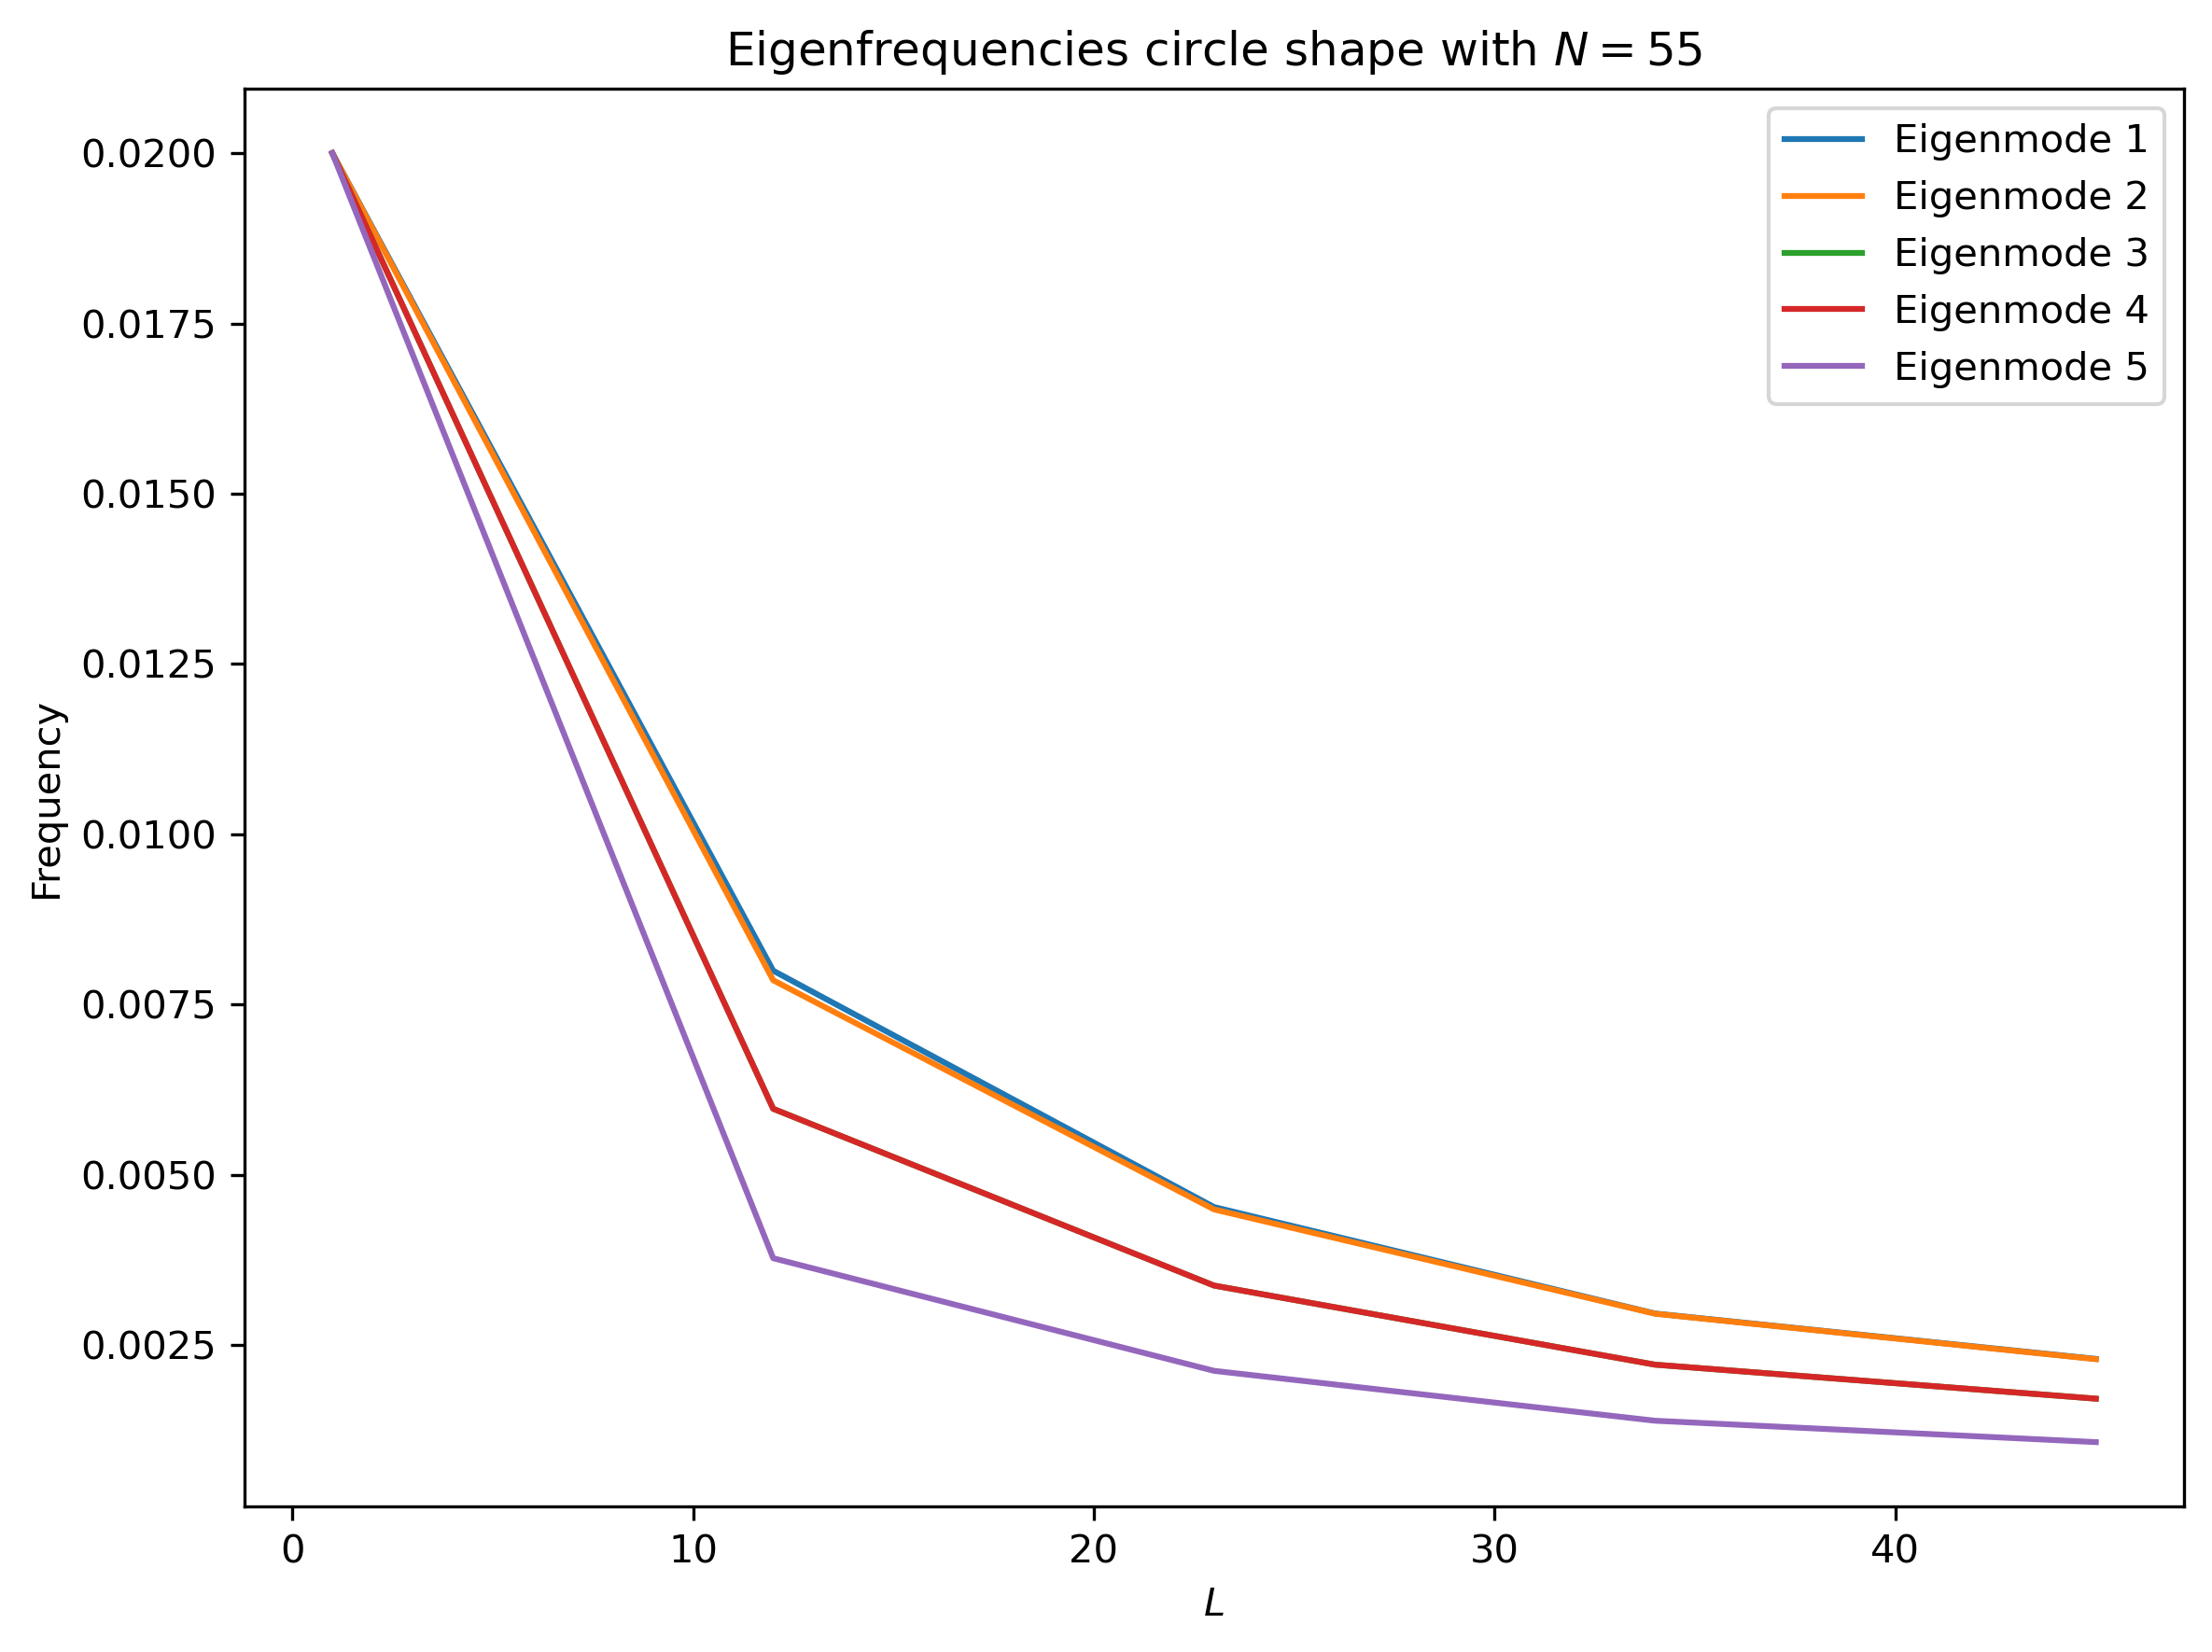

In [14]:
plot_shape_frequency("circle")

In [ ]:
t_list = np.linspace(0, TIME_MAX, TIME_STEPS)
N = 50
L = 45

v = initialize_grid_vector(N, L, shape="square")
M = initialize_tridiagonal_matrix(vector=v, sparse=True)
# M = M * dx**2
frequencies, eigenvectors = solve_eigenvalues(M, model="h")

eigenmodus = eigenvectors[:, SELECT_MODE].reshape(N, N).real
eigenmodus = normalize_eigenmodus(eigenmodus)
frequency = frequencies[SELECT_MODE]

plot_eigenmode_animation(1.0, eigenmodus, frequency, t_list, shape, delete_img=True)

Time taken to solve the eigenvalues: 0.11 seconds using sparse solver with matrix of size 2500, N=50


In [ ]:
HTML(f'<img src="results/wave.gif">')

-----
# 3.2 Direct methods for solving the steady state problems
Lorem ipsum odor amet, consectetuer adipiscing elit. Varius nullam vulputate lobortis porttitor in odio mus dictum. Tellus phasellus congue hac, tempus montes ullamcorper himenaeos. Arcu bibendum convallis lacus taciti rutrum ac dictumst mollis. Cras nullam est nostra netus nascetur iaculis hendrerit. Odio parturient purus maecenas consectetur porta hendrerit lobortis sodales. Maecenas quisque gravida sed nisi odio pellentesque habitasse. Cras tempus lacinia rhoncus conubia duis massa. Sem nibh dui mus consequat facilisi. Porta malesuada porttitor neque turpis molestie?

Consequat dictum curabitur integer suspendisse inceptos. Habitant mattis odio lorem nostra feugiat vitae vel habitasse. Scelerisque vehicula turpis eleifend, felis aptent venenatis ante fames. Tincidunt auctor quam ipsum velit ornare augue. Etiam habitant felis diam; ullamcorper netus aenean consectetur leo. Purus phasellus potenti tortor maecenas pulvinar. Auctor cras cursus hac tempor nam leo ad.

_by: [Name]_

In [ ]:
# LOCAL IMPORTS

In [ ]:
# SOME CODE

In [ ]:
# SOME CODE

-----
# 3.3 The leapfrog method - efficient time integration
In this part, we solve a simple one dimensional harmonic oscillator equation using the leapfrog method.

First, we solve the equation for position and velocity for different values of $k$ and plot the results.

Next, we investigate how the initial velocity at the half step affects the accuracy of the method by comparing it to the analytical solution and testing with different sizes of the time steps $\Delta t$.

Finally, we add an external time-dependent sinusoidal driving force and investigate what happens when the driving force is close to the original frequency of the oscillator and show the phase plot (v, x) of various frequencies. 

_by: Anezka Potesilova_

In [1]:
from src.leapfrog import leapfrog, plot_leapfrog_various_k, plot_leapfrog_errors
import numpy as np
import matplotlib.pyplot as plt

We test three values of $k$ and the default time step size $\Delta t = 0.01$, and we plot the position and velocity for each of them.

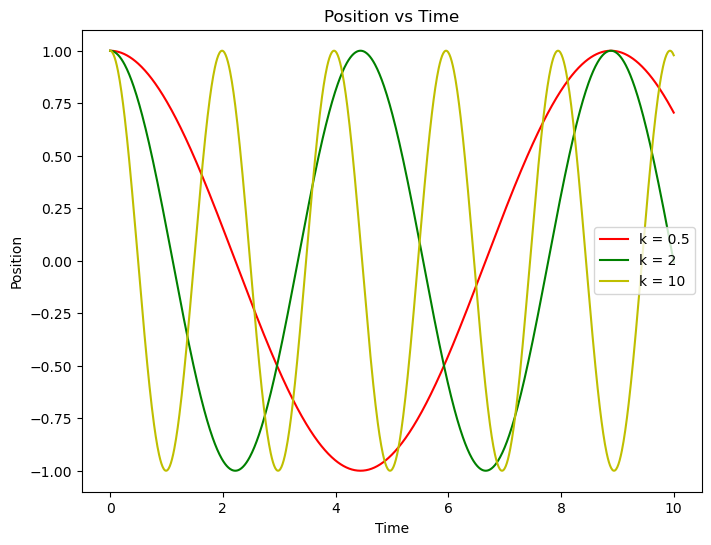

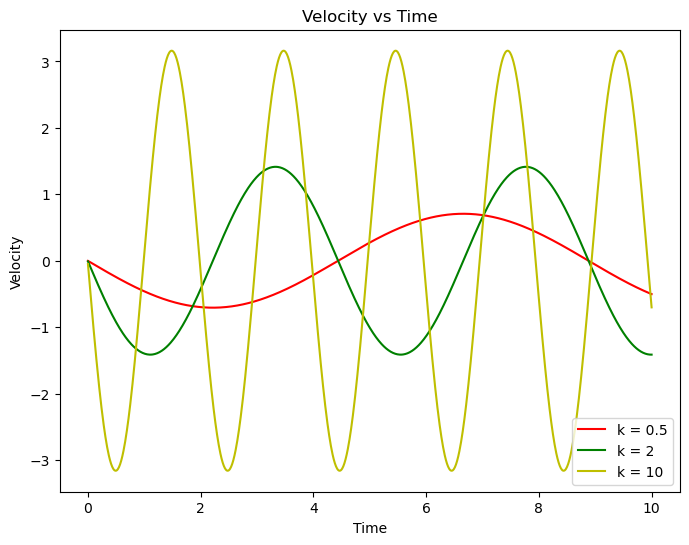

In [20]:
T = 10

def F_x(x, k):
    return -k * x

k_values = [0.5, 2, 10]
positions = []
velocities = []

for k in k_values:
    x_list, v_list = leapfrog(T, F_x, k)
    positions.append(x_list)
    velocities.append(v_list)

plot_leapfrog_various_k(positions, velocities, k_values, T, save=False)

Next, we test how the initial velocity at the half step affects the accuracy of the method for two options of the initial velocity and two step sizes and $k = 5$.

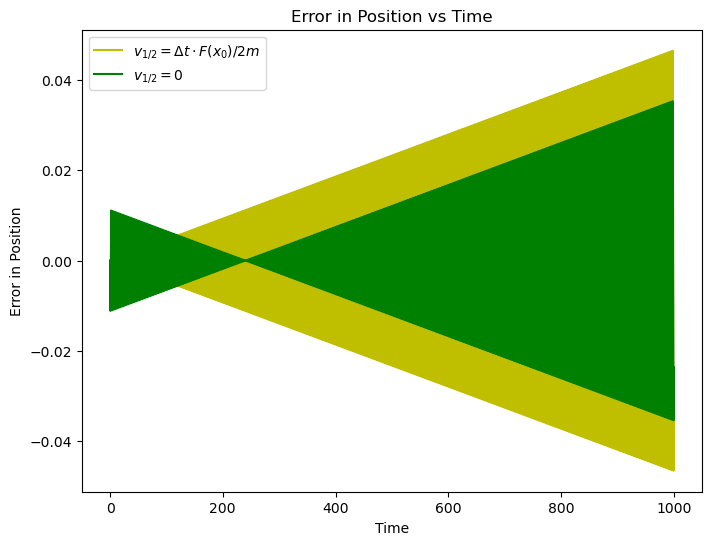

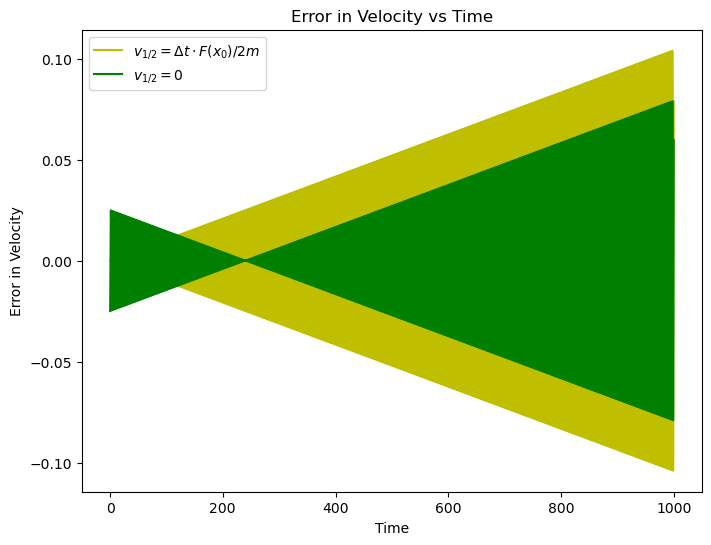

In [73]:
T = 1000
k = 5

def F_x(x, k):
    return -k * x

x_list_avg, v_list_avg = leapfrog(T, F_x, k)
x_list_zero, v_list_zero = leapfrog(T, F_x, k, initial_v="zero")

plot_leapfrog_errors([x_list_avg, x_list_zero], [v_list_avg, v_list_zero], k, T, save=False)

In [1]:
T = 1000
k = 5
delta_t = 0.05

def F_x(x, k):
    return -k * x

x_list_avg, v_list_avg = leapfrog(T, F_x, k, delta_t=delta_t)
x_list_zero, v_list_zero = leapfrog(T, F_x, k, initial_v="zero", delta_t=delta_t)

# plot_leapfrog_errors([x_list_avg, x_list_zero], [v_list_avg, v_list_zero], k, T, save=False, delta_t=delta_t)




m = 1
idx = int(5/delta_t)
# plot the calculated vs expected in the last 5 seconds
t_position = np.linspace(0, T, len(x_list_avg))

def exact_position(t, k, m):
    A = 1
    omega = np.sqrt(k / m)
    phi = np.pi / 2

    return A * np.sin(omega * t + phi)

plt.plot(
    t_position[-idx:],
    x_list_avg[-idx:],
    label=r"Calculated ($v_{1/2}$ Average)",
    color="y",
)
plt.plot(
    t_position[-idx:],
    x_list_zero[-idx:],
    label=r"Calculated ($v_{1/2} = 0$)",
    color="g",
)
plt.plot(
    t_position[-idx:],
    exact_position(t_position, k, m)[-idx:],
    label="Exact",
    color="r",
)
plt.title("Position vs Time")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.show()

NameError: name 'leapfrog' is not defined

Lastly, we add the external time-dependent sinusoidal driving force. TODO

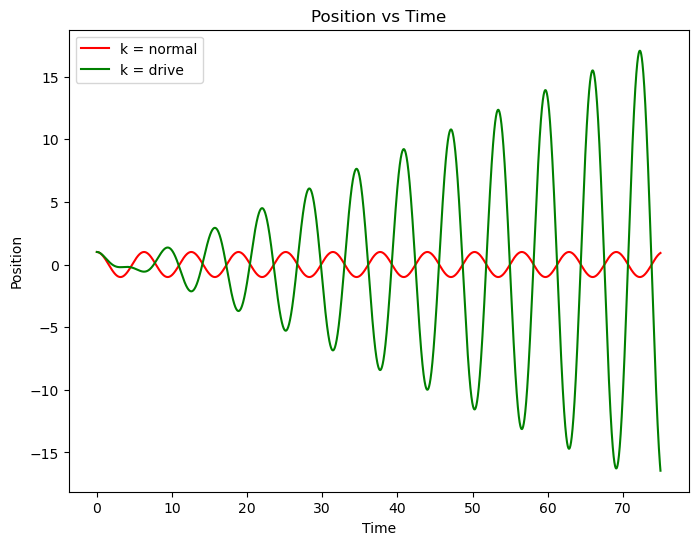

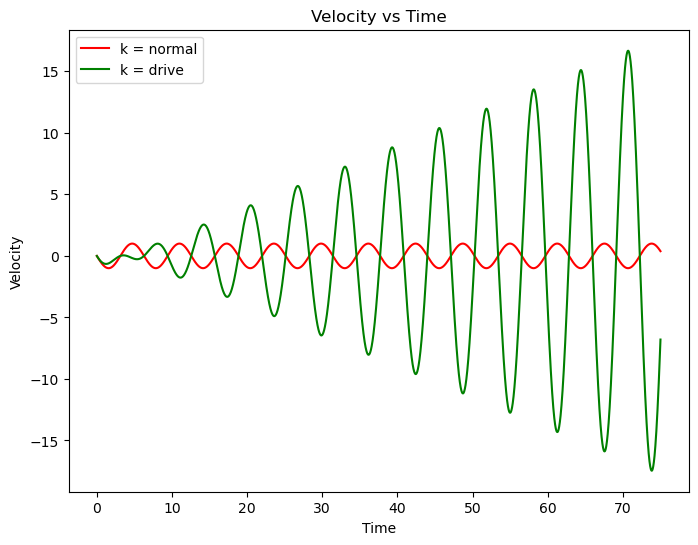

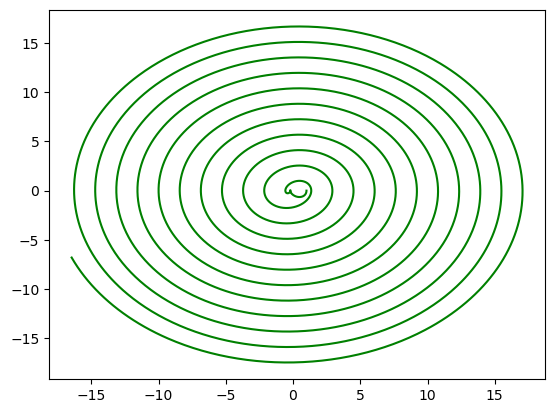

In [41]:
T = 75
k = 1
m = 1
omega = (k / m)**0.5

omega_drive = omega * 1
F_0 = 0.5

def F_x(x, k):
    return -k * x

def F_t(t):
    return F_0 * np.sin(omega_drive * t)

x_list, v_list = leapfrog(T, F_x, k)
x_list_drive, v_list_drive = leapfrog(T, F_x, k, F_t=F_t)


# Normal plots
plot_leapfrog_various_k([x_list,x_list_drive], [v_list,v_list_drive], ['normal', 'drive'], T, save=False)
# TODO: special plot function for the drive


# Phase plots
plt.plot(x_list_drive, v_list_drive, label='phase plot', color='g')
plt.show()
# TODO: labels etc

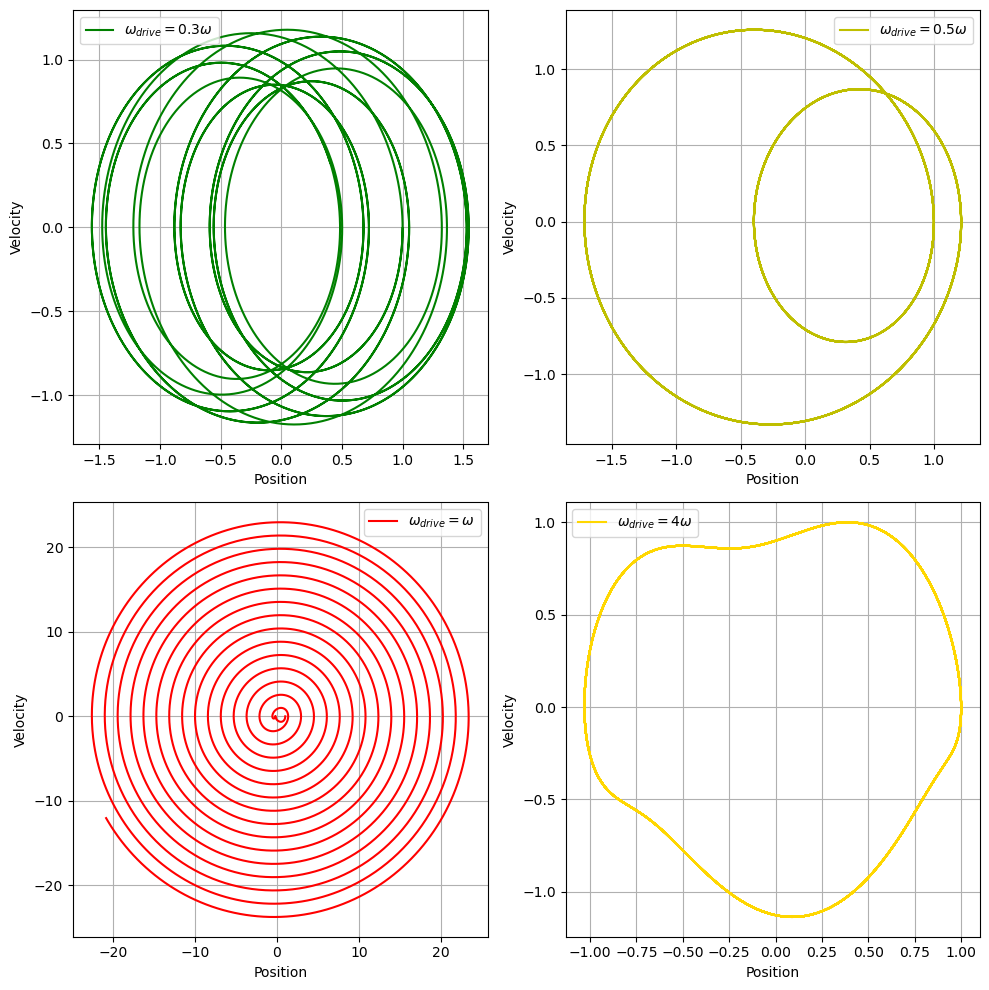

In [70]:
T = 100
k = 1
m = 1
omega = (k / m)**0.5

omegas = [omega*0.3, omega*0.5, omega, omega*4]
F_0 = 0.5

def F_x(x, k):
    return -k * x

positions = []
velocities = []

for omega_drive in omegas:
    def F_t(t):
        return F_0 * np.sin(omega_drive * t)

    x_list, v_list = leapfrog(T, F_x, k, F_t=F_t)
    positions.append(x_list)
    velocities.append(v_list)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
colors = ['g', 'y', 'r', 'gold']
labels = [r'$\omega_{drive} = 0.3\omega$', r'$\omega_{drive} = 0.5\omega$', r'$\omega_{drive} = \omega$', r'$\omega_{drive} = 4\omega$']

for i, ax in enumerate(axes.flat):
    ax.plot(positions[i], velocities[i], color=colors[i], label=labels[i])
    ax.set_xlabel('Position')
    ax.set_ylabel('Velocity')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()
# TODO: labels etc

In [74]:
omega = (k / m)**0.5

In [75]:
print(omega)

2.23606797749979
